<!DOCTYPE html>
<html>
<head>
<title>Living a life project by Michał Kaszuba</title>
</head>
<body>
<h3>Sources and credits:</h3>

<p>FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE</p> 
<p><a href="https://www.gapminder.org/data/">lhttps://www.gapminder.org/data/t</a></p>
<p><a href="http://gapm.io/dhapiscore_whr">http://gapm.io/dhapiscore_whrt</a></p>
<p><a href="https://www.systemicpeace.org/polityproject.html">https://www.systemicpeace.org/polityproject.html</a></p>
<p><a href="https://hdr.undp.org/en">https://hdr.undp.org/ent</a></p>
<p><a href="https://worldpopulationreview.com/continents/asia-population">https://worldpopulationreview.com/continents/asia-population</a></p>


<h3>In this one I will try to anwser following questions:</h3>

<p>Do people living in democratic countries tends to be more happy?</p>
<p>Do they earn more money?</p>
<p>Which continent has the highest score on average in human development report?</p>
<p>Which country made the biggest progress in terms of human development in the last decade?</p>
<p>What would be 10 greatest countries to live in terms of happiness and prosperity?</p>

</body>
</html>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
hdindex = pd.read_csv('./hdi_human_development_index.csv',usecols=['country','2005','2006','2007','2008','2009',
                                                                                '2010','2011','2012','2013','2014','2015',
                                                                               '2016','2017','2018','2019'])

In [3]:
income = pd.read_csv('./income_per_person_gdppercapita_ppp_inflation_adjusted.csv',
                     usecols=['country','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014',
                              '2015','2016','2017','2018','2019'])

In [4]:
happy = pd.read_csv('./hapiscore_whr.csv')

In [5]:
democracy = pd.read_csv('./democracy_score_use_as_color.csv',usecols=['country','2005','2006','2007','2008','2009',
                                                                                '2010','2011'])

Preparing datasets

In [6]:
hdindex.head(3)

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.418,0.429,0.447,0.447,0.460,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,Angola,0.460,0.473,0.489,0.501,0.515,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
2,Albania,0.706,0.713,0.722,0.728,0.733,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795


In [7]:
income.head(3)

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,1290,1320,1460,1480,1760,1960,1910,2080,2120,2100,2070,2060,2060,2030,2070
1,Angola,4310,5610,6960,7850,7760,7690,7680,8040,8140,8240,8040,7570,7310,6930,6670
2,Albania,8040,8570,9150,9910,10.3k,10.7k,11.1k,11.2k,11.4k,11.6k,11.9k,12.3k,12.8k,13.3k,13.7k


In [8]:
happy.head(3)

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8


In [9]:
democracy.head(3)

,country,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,−2,−2,−2,−2,−2,−2,−2
2,Albania,9,9,9,9,9,9,9


In [10]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  195 non-null    object
 1   2005     195 non-null    object
 2   2006     195 non-null    object
 3   2007     195 non-null    object
 4   2008     195 non-null    object
 5   2009     195 non-null    object
 6   2010     195 non-null    object
 7   2011     195 non-null    object
 8   2012     195 non-null    object
 9   2013     195 non-null    object
 10  2014     195 non-null    object
 11  2015     195 non-null    object
 12  2016     195 non-null    object
 13  2017     195 non-null    object
 14  2018     195 non-null    object
 15  2019     195 non-null    object
dtypes: object(16)
memory usage: 24.5+ KB


In [11]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  163 non-null    object 
 1   2005     27 non-null     float64
 2   2006     89 non-null     float64
 3   2007     101 non-null    float64
 4   2008     109 non-null    float64
 5   2009     113 non-null    float64
 6   2010     123 non-null    float64
 7   2011     145 non-null    float64
 8   2012     140 non-null    float64
 9   2013     135 non-null    float64
 10  2014     143 non-null    float64
 11  2015     141 non-null    float64
 12  2016     140 non-null    float64
 13  2017     146 non-null    float64
 14  2018     134 non-null    float64
 15  2019     151 non-null    float64
dtypes: float64(15), object(1)
memory usage: 20.5+ KB


In [12]:
democracy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  175 non-null    object
 1   2005     163 non-null    object
 2   2006     163 non-null    object
 3   2007     162 non-null    object
 4   2008     163 non-null    object
 5   2009     163 non-null    object
 6   2010     163 non-null    object
 7   2011     163 non-null    object
dtypes: object(8)
memory usage: 11.1+ KB


In [13]:
hdindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  189 non-null    object 
 1   2005     185 non-null    float64
 2   2006     186 non-null    float64
 3   2007     186 non-null    float64
 4   2008     186 non-null    float64
 5   2009     186 non-null    float64
 6   2010     188 non-null    float64
 7   2011     188 non-null    float64
 8   2012     188 non-null    float64
 9   2013     188 non-null    float64
 10  2014     188 non-null    float64
 11  2015     188 non-null    float64
 12  2016     188 non-null    float64
 13  2017     189 non-null    float64
 14  2018     189 non-null    float64
 15  2019     189 non-null    float64
dtypes: float64(15), object(1)
memory usage: 23.8+ KB


In [14]:
def timesK(x):
    if 'k' in x:
        try:
            first,second = x.split(sep='k')
            result = float(first)*1000
            return float(result)
        except:
            return x
    elif 'k' not in x:
        try:
            return float(x)
        except:
            return x
        

In [15]:
for year in income:
    income[year] = income[year].apply(timesK)

In [16]:
income.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,1290.0,1320.0,1460.0,1480.0,1760.0,1960.0,1910.0,2080.0,2120.0,2100.0,2070.0,2060.0,2060.0,2030.0,2070.0
1,Angola,4310.0,5610.0,6960.0,7850.0,7760.0,7690.0,7680.0,8040.0,8140.0,8240.0,8040.0,7570.0,7310.0,6930.0,6670.0
2,Albania,8040.0,8570.0,9150.0,9910.0,10300.0,10700.0,11100.0,11200.0,11400.0,11600.0,11900.0,12300.0,12800.0,13300.0,13700.0
3,Andorra,45000.0,48400.0,49200.0,46900.0,47200.0,44100.0,47500.0,47500.0,49500.0,50900.0,52700.0,54500.0,56300.0,58300.0,58400.0
4,United Arab Emirates,80800.0,86400.0,76600.0,68800.0,58400.0,54900.0,56100.0,57400.0,59900.0,62500.0,65300.0,66500.0,67200.0,67000.0,68300.0


In [17]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  195 non-null    object 
 1   2005     195 non-null    float64
 2   2006     195 non-null    float64
 3   2007     195 non-null    float64
 4   2008     195 non-null    float64
 5   2009     195 non-null    float64
 6   2010     195 non-null    float64
 7   2011     195 non-null    float64
 8   2012     195 non-null    float64
 9   2013     195 non-null    float64
 10  2014     195 non-null    float64
 11  2015     195 non-null    float64
 12  2016     195 non-null    float64
 13  2017     195 non-null    float64
 14  2018     195 non-null    float64
 15  2019     195 non-null    float64
dtypes: float64(15), object(1)
memory usage: 24.5+ KB


In [18]:
def makeAnumber(x):
    if '−' in x:
        try:
            first,second = x.split(sep='−')
            result = float(second)*(-1)
            return float(result)
        except:
            return x
    elif '−' not in x:
        try:
            return float(x)
        except:
            return x

In [19]:
democracy = democracy.astype(str)

In [20]:
for year in democracy:
    democracy[year] = democracy[year].apply(makeAnumber)

In [21]:
democracy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  175 non-null    object 
 1   2005     163 non-null    float64
 2   2006     163 non-null    float64
 3   2007     162 non-null    float64
 4   2008     163 non-null    float64
 5   2009     163 non-null    float64
 6   2010     163 non-null    float64
 7   2011     163 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.1+ KB


Prepering datasets Democracy vs Happiness

In [22]:
democracy = democracy.fillna(axis=1,method='bfill')

In [23]:
happy = happy.fillna(axis=1,method='bfill')

In [24]:
demohappy = democracy.merge(happy,how='inner',on='country',suffixes=['_democracy','_happyness'],sort=True)

In [25]:
demohappy.head()

,country,2005_democracy,2006_democracy,2007_democracy,2008_democracy,2009_democracy,2010_democracy,2011_democracy,2005_happyness,2006_happyness,...,2010_happyness,2011_happyness,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.2,37.2,...,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
1,Albania,9.0,9.0,9.0,9.0,9.0,9.0,9.0,46.3,46.3,...,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
2,Algeria,2.0,2.0,2.0,2.0,2.0,2.0,2.0,54.6,54.6,...,54.6,53.2,56.0,63.5,63.5,53.4,53.4,52.5,50.4,50.1
3,Angola,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,55.9,55.9,...,55.9,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
4,Argentina,8.0,8.0,8.0,8.0,8.0,8.0,8.0,63.1,63.1,...,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7


In [26]:
demohappy.drop(axis=1,columns=['2012','2013','2014','2015','2016','2017','2018','2019'],inplace=True)

In [27]:
demohappy.head()

,country,2005_democracy,2006_democracy,2007_democracy,2008_democracy,2009_democracy,2010_democracy,2011_democracy,2005_happyness,2006_happyness,2007_happyness,2008_happyness,2009_happyness,2010_happyness,2011_happyness
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.2,37.2,37.2,37.2,44.0,47.6,38.3
1,Albania,9.0,9.0,9.0,9.0,9.0,9.0,9.0,46.3,46.3,46.3,54.9,54.9,52.7,58.7
2,Algeria,2.0,2.0,2.0,2.0,2.0,2.0,2.0,54.6,54.6,54.6,54.6,54.6,54.6,53.2
3,Angola,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,55.9,55.9,55.9,55.9,55.9,55.9,55.9
4,Argentina,8.0,8.0,8.0,8.0,8.0,8.0,8.0,63.1,63.1,60.7,59.6,64.2,64.4,67.8


In [28]:
demohappy.dropna(inplace=True)

In [29]:
demohappy = demohappy.astype(str)

In [30]:
for year in demohappy:
    demohappy[year] = demohappy[year].apply(makeAnumber)

In [31]:
demohappy.sort_index().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 155
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         151 non-null    object 
 1   2005_democracy  151 non-null    float64
 2   2006_democracy  151 non-null    float64
 3   2007_democracy  151 non-null    float64
 4   2008_democracy  151 non-null    float64
 5   2009_democracy  151 non-null    float64
 6   2010_democracy  151 non-null    float64
 7   2011_democracy  151 non-null    float64
 8   2005_happyness  151 non-null    float64
 9   2006_happyness  151 non-null    float64
 10  2007_happyness  151 non-null    float64
 11  2008_happyness  151 non-null    float64
 12  2009_happyness  151 non-null    float64
 13  2010_happyness  151 non-null    float64
 14  2011_happyness  151 non-null    float64
dtypes: float64(14), object(1)
memory usage: 18.9+ KB


Prepering datasets Democracy vs Income

In [32]:
democracy = democracy.fillna(axis=1,method='bfill')

In [33]:
demoinc = democracy.merge(income,how='inner',on='country',suffixes=['_democracy','_income'],sort=True)

In [34]:
demoinc.drop(axis=1,columns=['2012','2013','2014','2015','2016','2017','2018','2019'],inplace=True)

In [35]:
demoinc.dropna(inplace=True)

In [36]:
demoinc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 1 to 164
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         162 non-null    object 
 1   2005_democracy  162 non-null    float64
 2   2006_democracy  162 non-null    float64
 3   2007_democracy  162 non-null    float64
 4   2008_democracy  162 non-null    float64
 5   2009_democracy  162 non-null    float64
 6   2010_democracy  162 non-null    float64
 7   2011_democracy  162 non-null    float64
 8   2005_income     162 non-null    float64
 9   2006_income     162 non-null    float64
 10  2007_income     162 non-null    float64
 11  2008_income     162 non-null    float64
 12  2009_income     162 non-null    float64
 13  2010_income     162 non-null    float64
 14  2011_income     162 non-null    float64
dtypes: float64(14), object(1)
memory usage: 20.2+ KB


Prepering datasets Split for continents in HDI

In [37]:
africa = pd.read_csv('./Africa.csv',usecols=['name'])
asia = pd.read_csv('./Asia.csv',usecols=['name'])
europe = pd.read_csv('./Europe.csv',usecols=['name'])
northamerica = pd.read_csv('./NorthAmerica.csv',usecols=['name'])
southamerica = pd.read_csv('./SouthAmerica.csv',usecols=['name'])

In [38]:
hdindex.tail(2)

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
187,Zambia,0.471,0.482,0.488,0.503,0.517,0.527,0.534,0.549,0.557,0.561,0.569,0.571,0.578,0.582,0.584
188,Zimbabwe,0.411,0.414,0.421,0.422,0.458,0.482,0.499,0.525,0.537,0.547,0.553,0.558,0.563,0.569,0.571


In [39]:
hdindex.insert(loc=1,column='continent',value=0)

In [40]:
africat= ['Cote d\'Ivoire','Congo, Dem. Rep.','Congo, Rep.']
for country in africa['name']:
    africat.append(country)

In [41]:
asiat = ['Hong Kong, China','Kyrgyz Republic','Lao']
for country in asia['name']:
    asiat.append(country)

In [42]:
europet = ['Slovak Republic']
for country in europe['name']:
    europet.append(country)

In [43]:
northamericat = ['St. Kitts and Nevis','St. Lucia','St. Vincent and the Grenadines']
for country in northamerica['name']:
    northamericat.append(country)

In [44]:
southamericat = []
for country in southamerica['name']:
    southamericat.append(country)

In [45]:
for country in hdindex['country']:
    if country in africat:
        hdindex.loc[hdindex['country']==country,['continent']] = 'africa'
    
    elif country in asiat:
        hdindex.loc[hdindex['country']==country,['continent']] = 'asia'
        
    elif country in europet:
        hdindex.loc[hdindex['country']==country,['continent']] = 'europe'
    
    elif country in northamericat:
        hdindex.loc[hdindex['country']==country,['continent']] = 'north america'
    
    elif country in southamericat:
        hdindex.loc[hdindex['country']==country,['continent']] = 'south america'
    else:
        hdindex.loc[hdindex['country']==country,['continent']] = 'australia & oceania'
        

In [46]:
contgroups = hdindex.groupby(by='continent').mean()

In [47]:
contgroups.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
continent,,,,,,,,,,,,,,,
africa,0.477769,0.485288,0.493346,0.501538,0.509692,0.514792,0.521585,0.528792,0.535962,0.541509,0.545811,0.549170,0.553736,0.557038,0.560736
asia,0.671283,0.679196,0.687174,0.693457,0.697413,0.703000,0.709532,0.715702,0.718723,0.721596,0.725787,0.728745,0.733277,0.736021,0.739362
australia & oceania,0.669545,0.673182,0.678091,0.681364,0.683273,0.688818,0.692273,0.694545,0.700273,0.703000,0.708091,0.709000,0.709667,0.710917,0.714083
europe,0.829707,0.834143,0.839905,0.844595,0.845381,0.849119,0.853524,0.856595,0.861667,0.865333,0.867952,0.871238,0.874238,0.877310,0.879881
north america,0.710696,0.717870,0.722913,0.728130,0.728870,0.731826,0.734304,0.736000,0.738478,0.743261,0.746478,0.749391,0.751435,0.753174,0.755957


Prepering data for HDI last decade

In [48]:
hdindex.head(2)

,country,continent,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,asia,0.418,0.429,0.447,0.447,0.460,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,Angola,africa,0.460,0.473,0.489,0.501,0.515,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


In [49]:
hdilastdecade = hdindex.drop(axis=1,columns=['continent','2005','2006','2007','2008']).set_index('country')

In [50]:
hdilastdecade.head(2)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,
Afghanistan,0.460,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
Angola,0.515,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


In [51]:
hdilastdecade.insert(loc=0,column='progress_2009-2019',value=0)

In [52]:
for country in hdilastdecade['2009']:
    hdilastdecade['progress_2009-2019'] = hdilastdecade['2019'] - hdilastdecade['2009'] 

Prepering data for top 10 countries

In [53]:
happy2019 = happy.drop(axis=1,columns=['2005','2006','2007','2008','2009',
                                       '2010','2011','2012','2013','2014','2015','2016','2017','2018'])

In [54]:
income2019 = income.drop(axis=1,columns=['2005','2006','2007','2008','2009',
                                        '2010','2011','2012','2013','2014','2015','2016','2017','2018'])

In [55]:
top = income2019.merge(happy2019,how='inner',on='country',suffixes=['_income','_happyness'],sort=True).set_index('country').dropna()

In [56]:
top.head()

,2019_income,2019_happyness
country,,
Afghanistan,2070.0,25.7
Albania,13700.0,48.8
Algeria,11500.0,50.1
Argentina,22100.0,59.7
Armenia,13700.0,46.8


Closer look on to the data

Do people living in democratic countries tends to be
more happy?

In [57]:
demohappy.head()

,country,2005_democracy,2006_democracy,2007_democracy,2008_democracy,2009_democracy,2010_democracy,2011_democracy,2005_happyness,2006_happyness,2007_happyness,2008_happyness,2009_happyness,2010_happyness,2011_happyness
1,Albania,9.0,9.0,9.0,9.0,9.0,9.0,9.0,46.3,46.3,46.3,54.9,54.9,52.7,58.7
2,Algeria,2.0,2.0,2.0,2.0,2.0,2.0,2.0,54.6,54.6,54.6,54.6,54.6,54.6,53.2
3,Angola,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,55.9,55.9,55.9,55.9,55.9,55.9,55.9
4,Argentina,8.0,8.0,8.0,8.0,8.0,8.0,8.0,63.1,63.1,60.7,59.6,64.2,64.4,67.8
5,Armenia,5.0,5.0,5.0,5.0,5.0,5.0,5.0,42.9,42.9,48.8,46.5,41.8,43.7,42.6


To answer this question, we will compare democracy indexes in range -10 to 10, where -10 means no democracy at all
and 10 means pure democracy with level of happiness of their societies in range 0 to 100.

<AxesSubplot:title={'center':'Influence of democracy on happiness on citizens in 2005'}, xlabel='Level of democracy', ylabel='Level of happiness'>

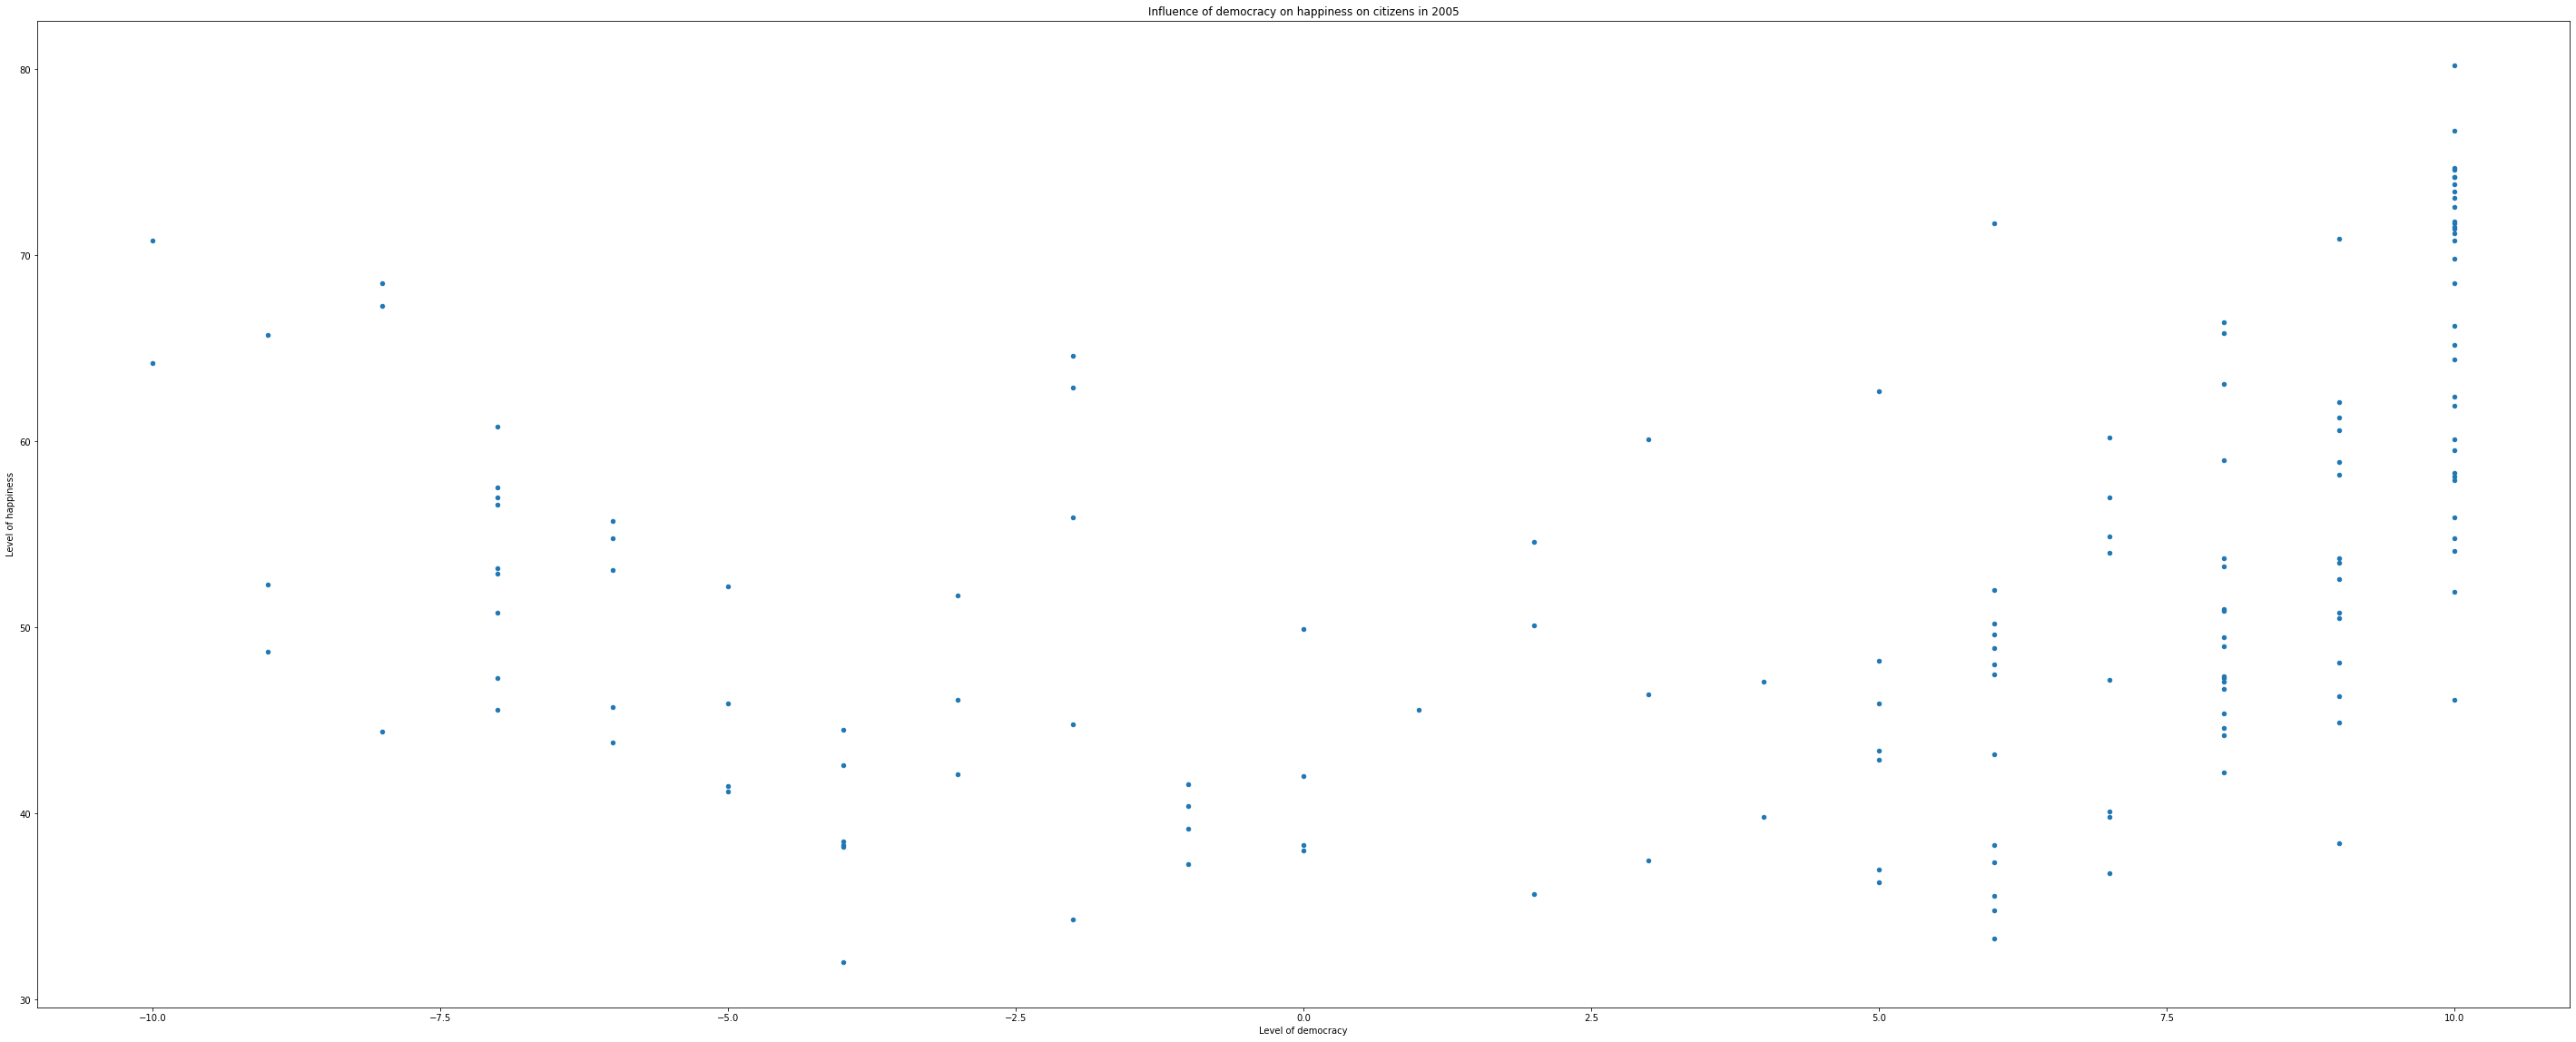

In [67]:
demohappy.plot(x='2005_democracy',y='2005_happyness',kind='scatter',figsize=(50,20),xlabel='Level of democracy',
               ylabel='Level of happiness',title='Influence of democracy on happiness on citizens in 2005')

As we can see on the scatter plot above: Yes, peoples in democratic countries tends to be more happy.
What is also interesting that peoples in countries with no democracy at all seems to be happy as well.
The lowest happiness is in countries around 0 on the democracy index. I guess it can be quite frustrating to have something to
say, but not enough to change anything. Understandable. Let's check if situation will change in following years.

<AxesSubplot:title={'center':'Influence of democracy on happiness on citizens in 2006'}, xlabel='Level of democracy', ylabel='Level of happiness'>

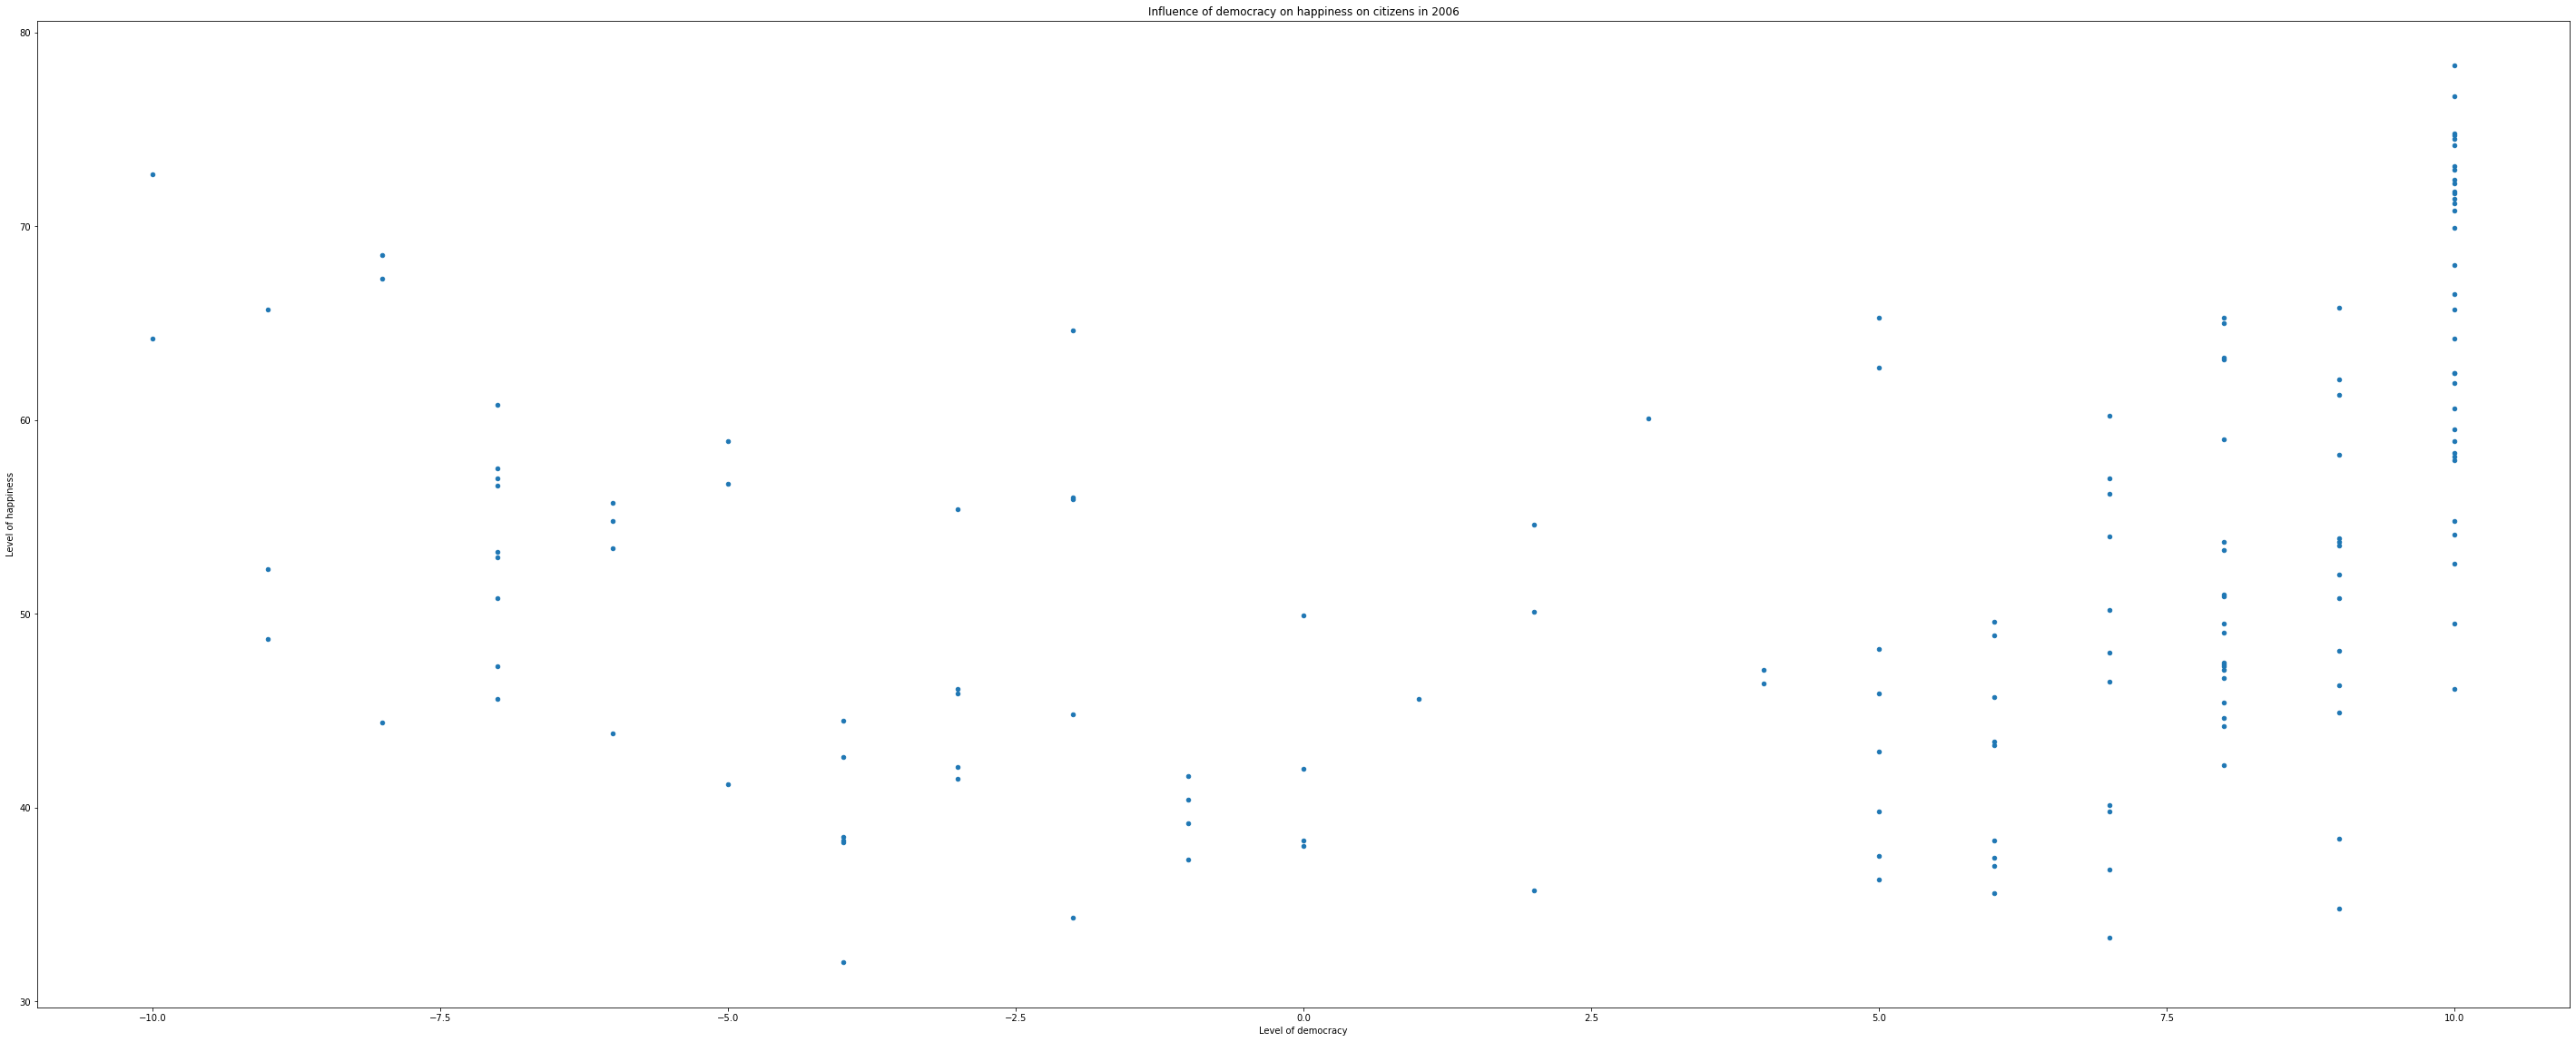

In [68]:
demohappy.plot(x='2006_democracy',y='2006_happyness',kind='scatter',figsize=(50,20),xlabel='Level of democracy',
               ylabel='Level of happiness',title='Influence of democracy on happiness on citizens in 2006')

<AxesSubplot:title={'center':'Influence of democracy on happiness on citizens in 2007'}, xlabel='Level of democracy', ylabel='Level of happiness'>

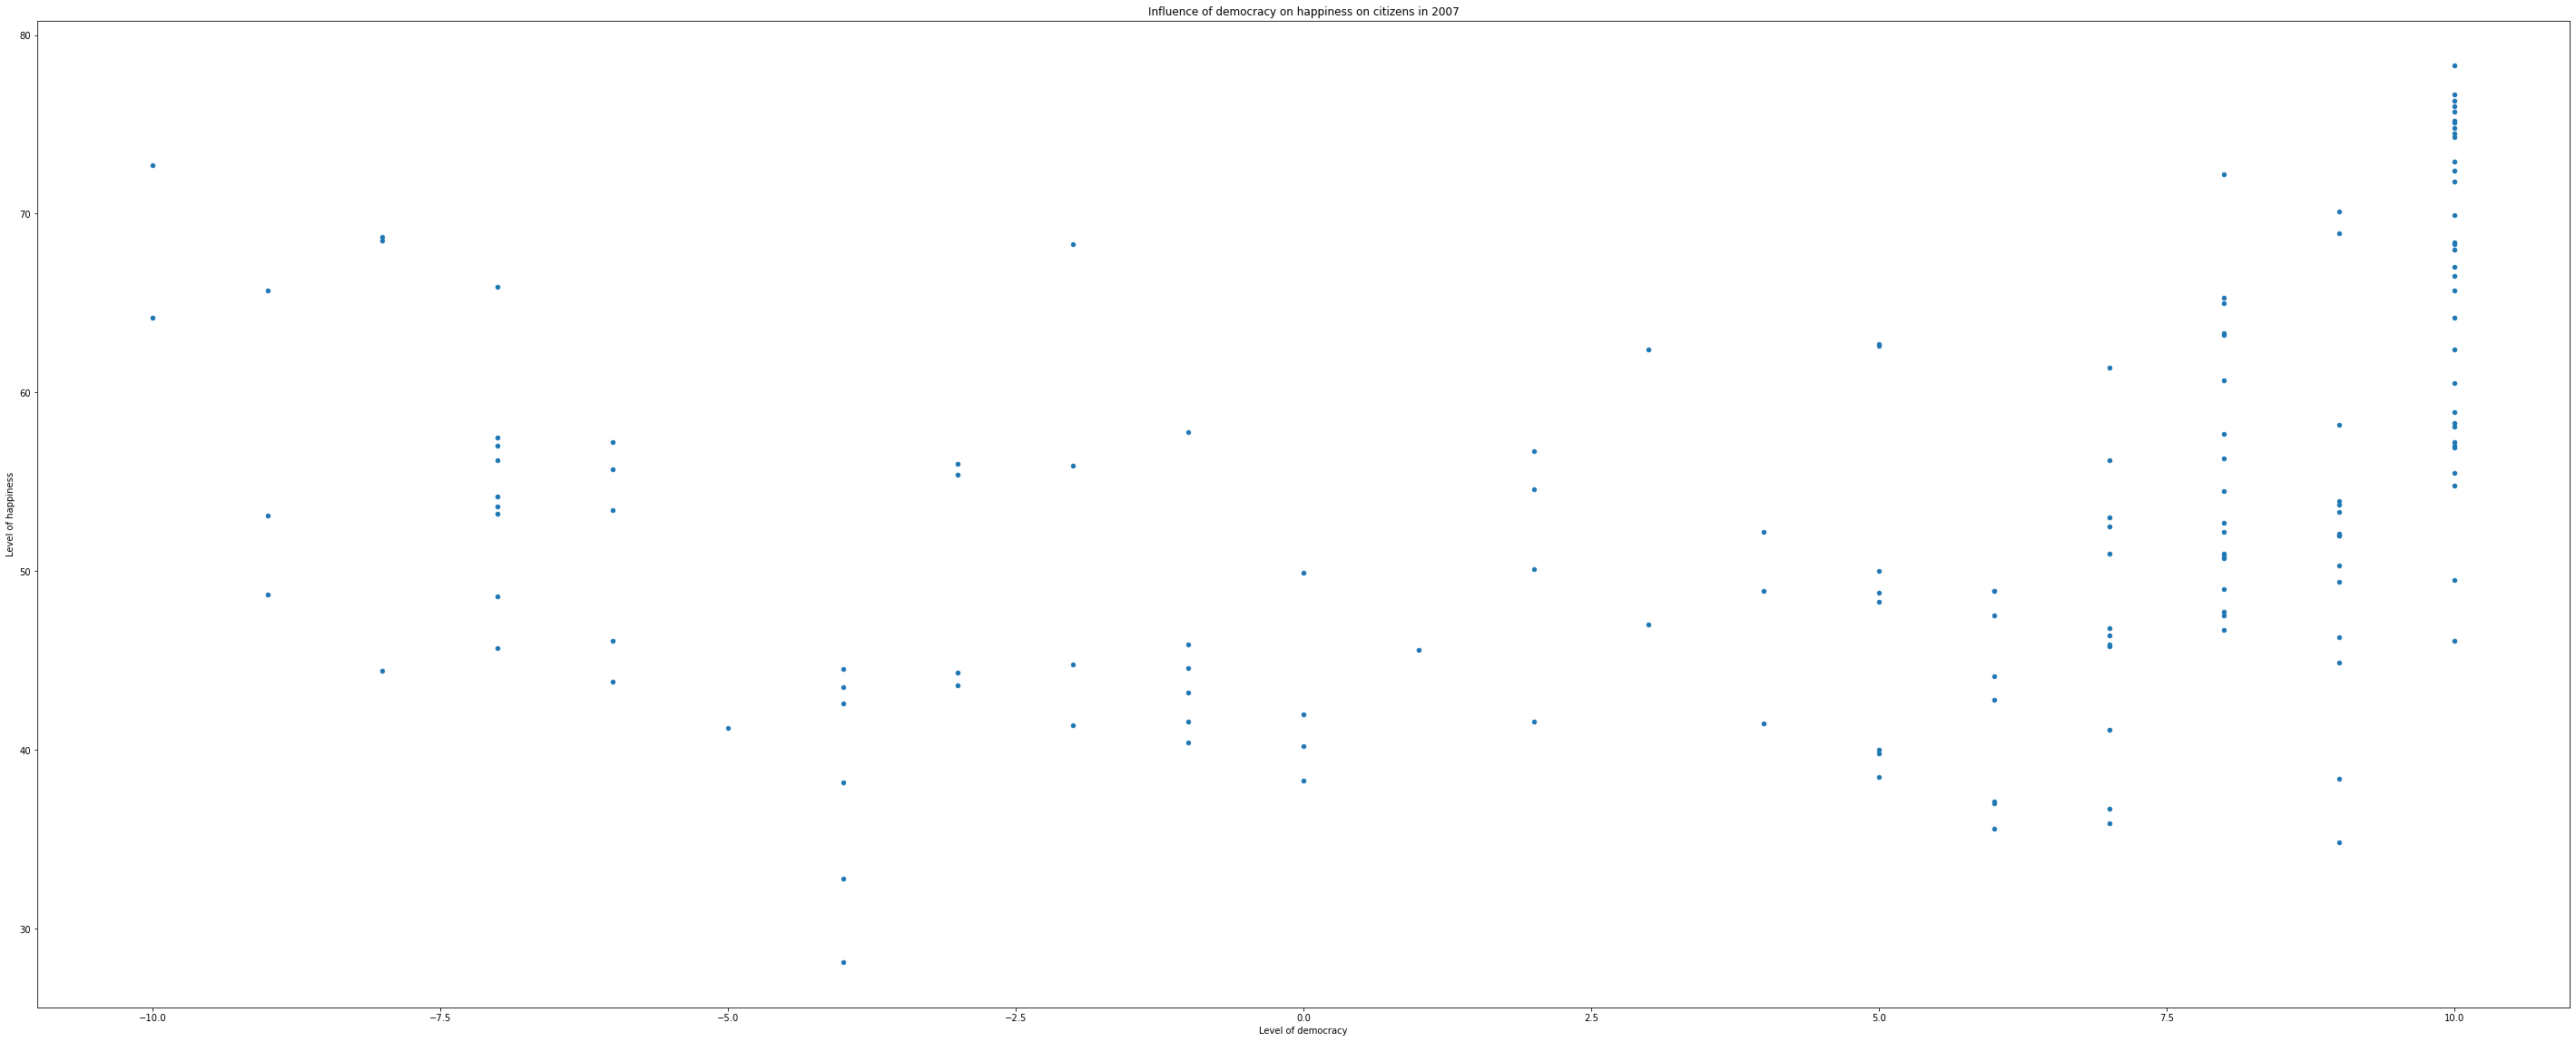

In [69]:
demohappy.plot(x='2007_democracy',y='2007_happyness',kind='scatter',figsize=(50,20),xlabel='Level of democracy',
               ylabel='Level of happiness',title='Influence of democracy on happiness on citizens in 2007')

<AxesSubplot:title={'center':'Influence of democracy on happiness on citizens in 2008'}, xlabel='Level of democracy', ylabel='Level of happiness'>

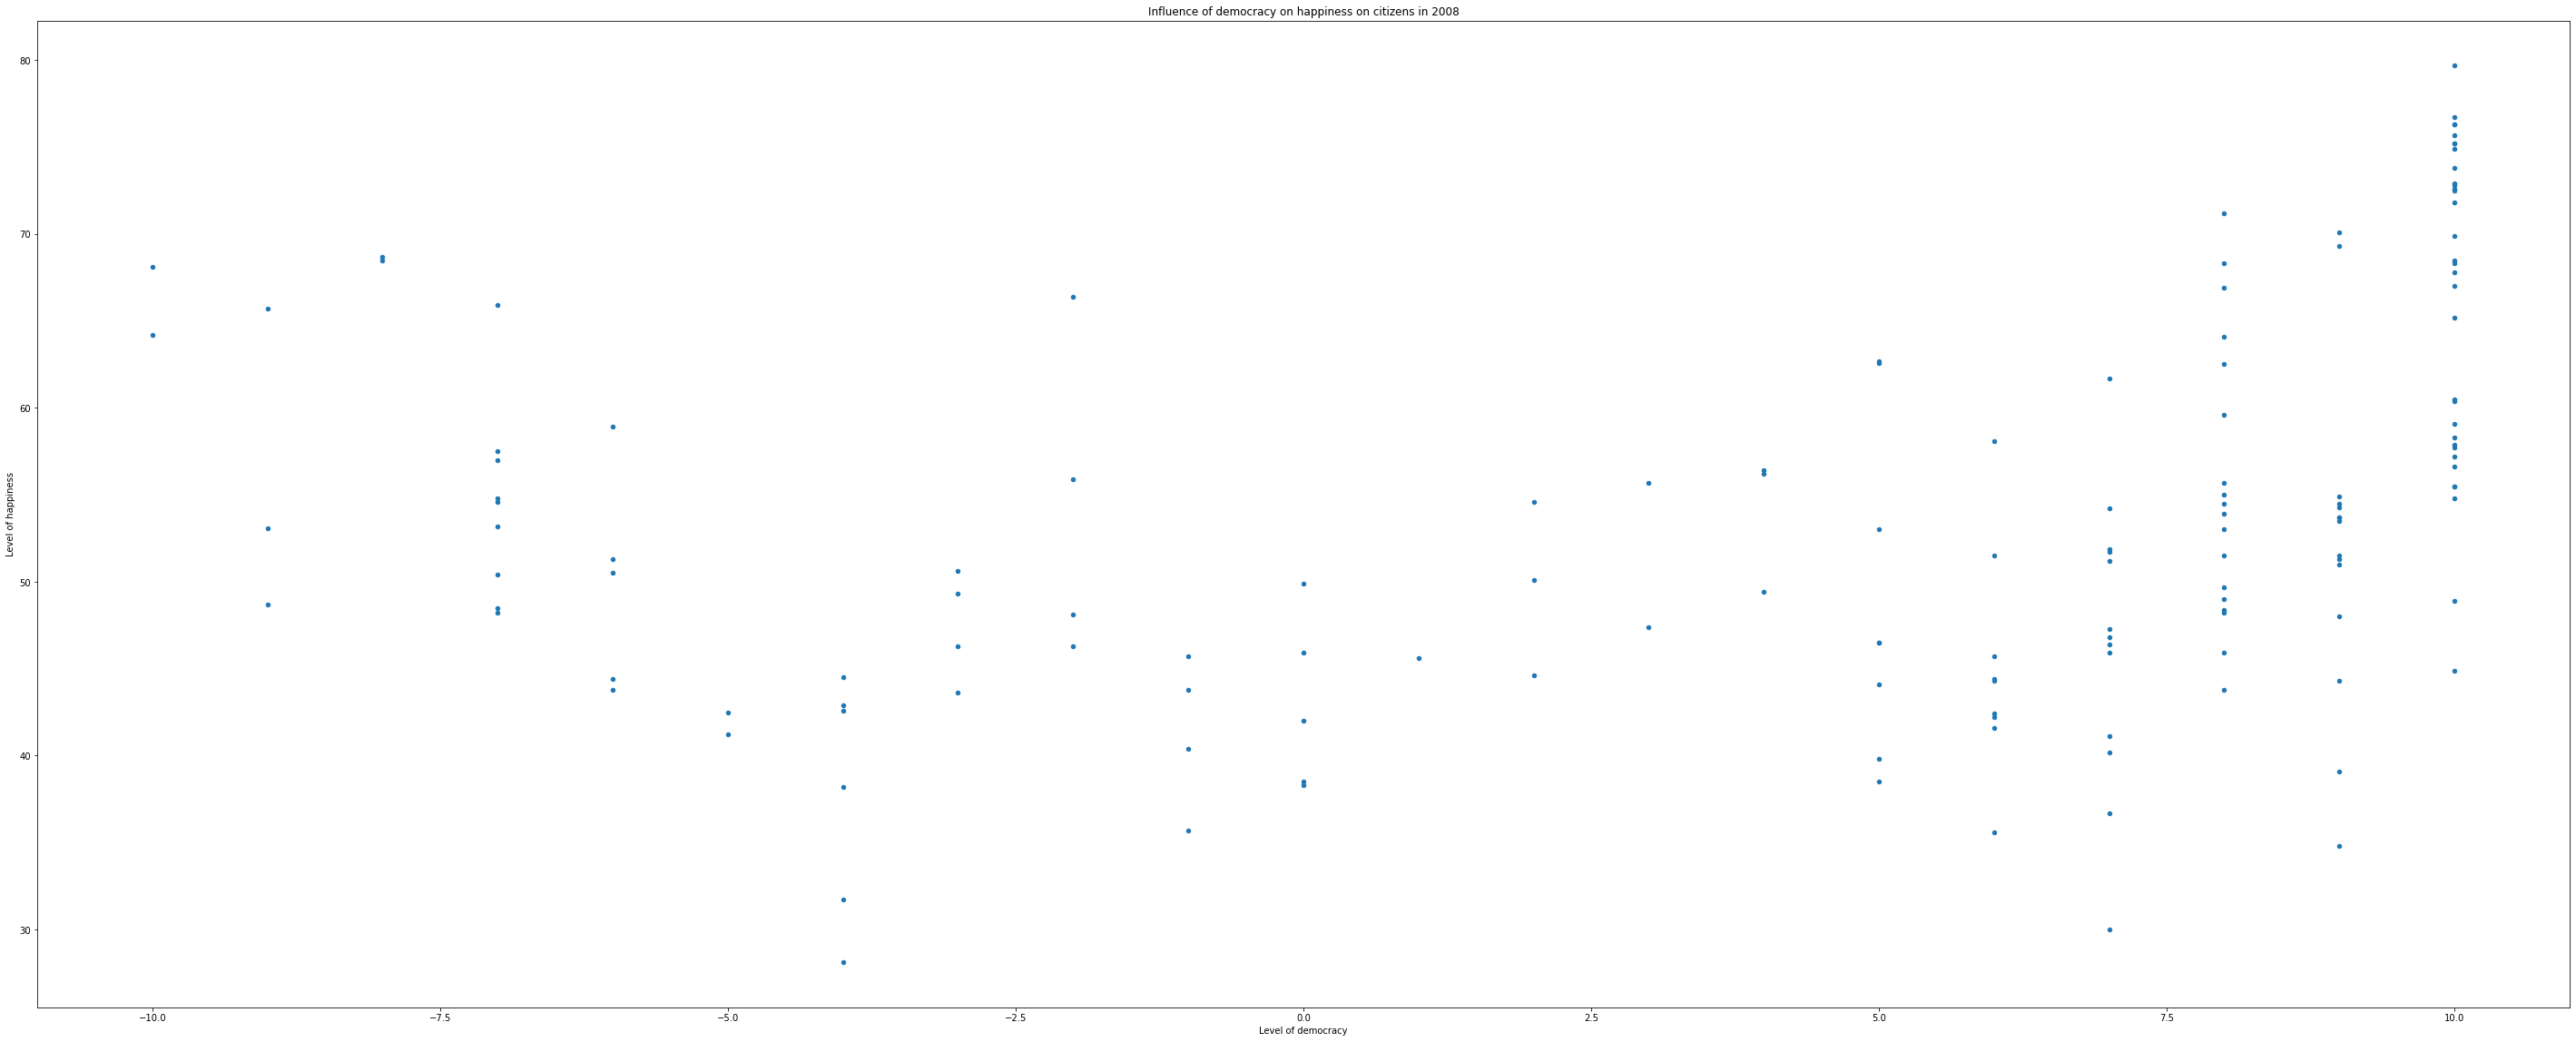

In [70]:
demohappy.plot(x='2008_democracy',y='2008_happyness',kind='scatter',figsize=(50,20),xlabel='Level of democracy',
               ylabel='Level of happiness',title='Influence of democracy on happiness on citizens in 2008')

<AxesSubplot:title={'center':'Influence of democracy on happiness on citizens in 2009'}, xlabel='Level of democracy', ylabel='Level of happiness'>

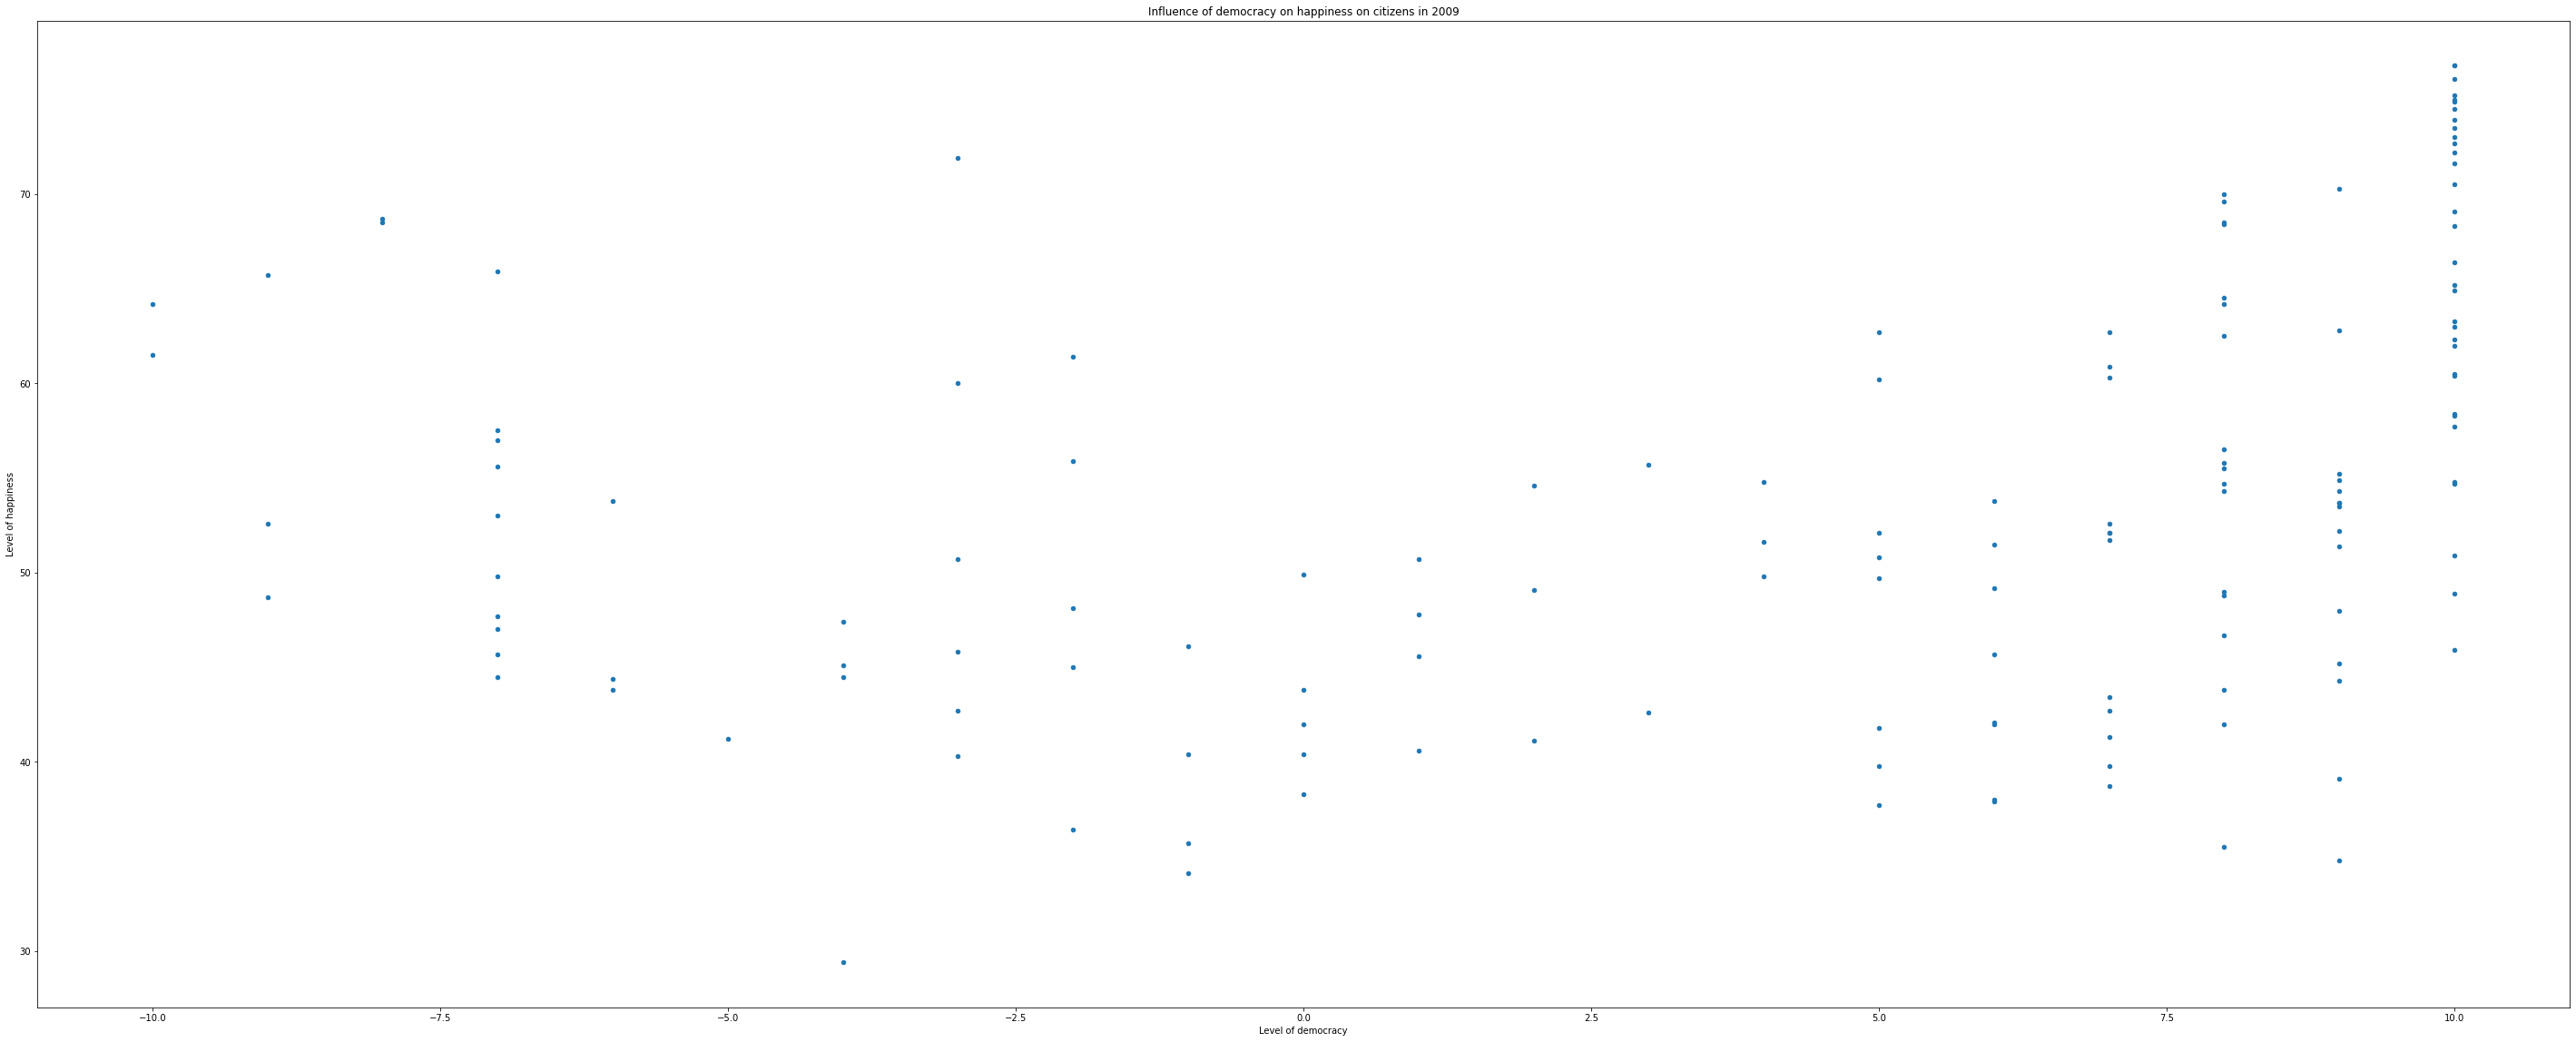

In [71]:
demohappy.plot(x='2009_democracy',y='2009_happyness',kind='scatter',figsize=(50,20),xlabel='Level of democracy',
               ylabel='Level of happiness',title='Influence of democracy on happiness on citizens in 2009')

<AxesSubplot:title={'center':'Influence of democracy on happiness on citizens in 2010'}, xlabel='Level of democracy', ylabel='Level of happiness'>

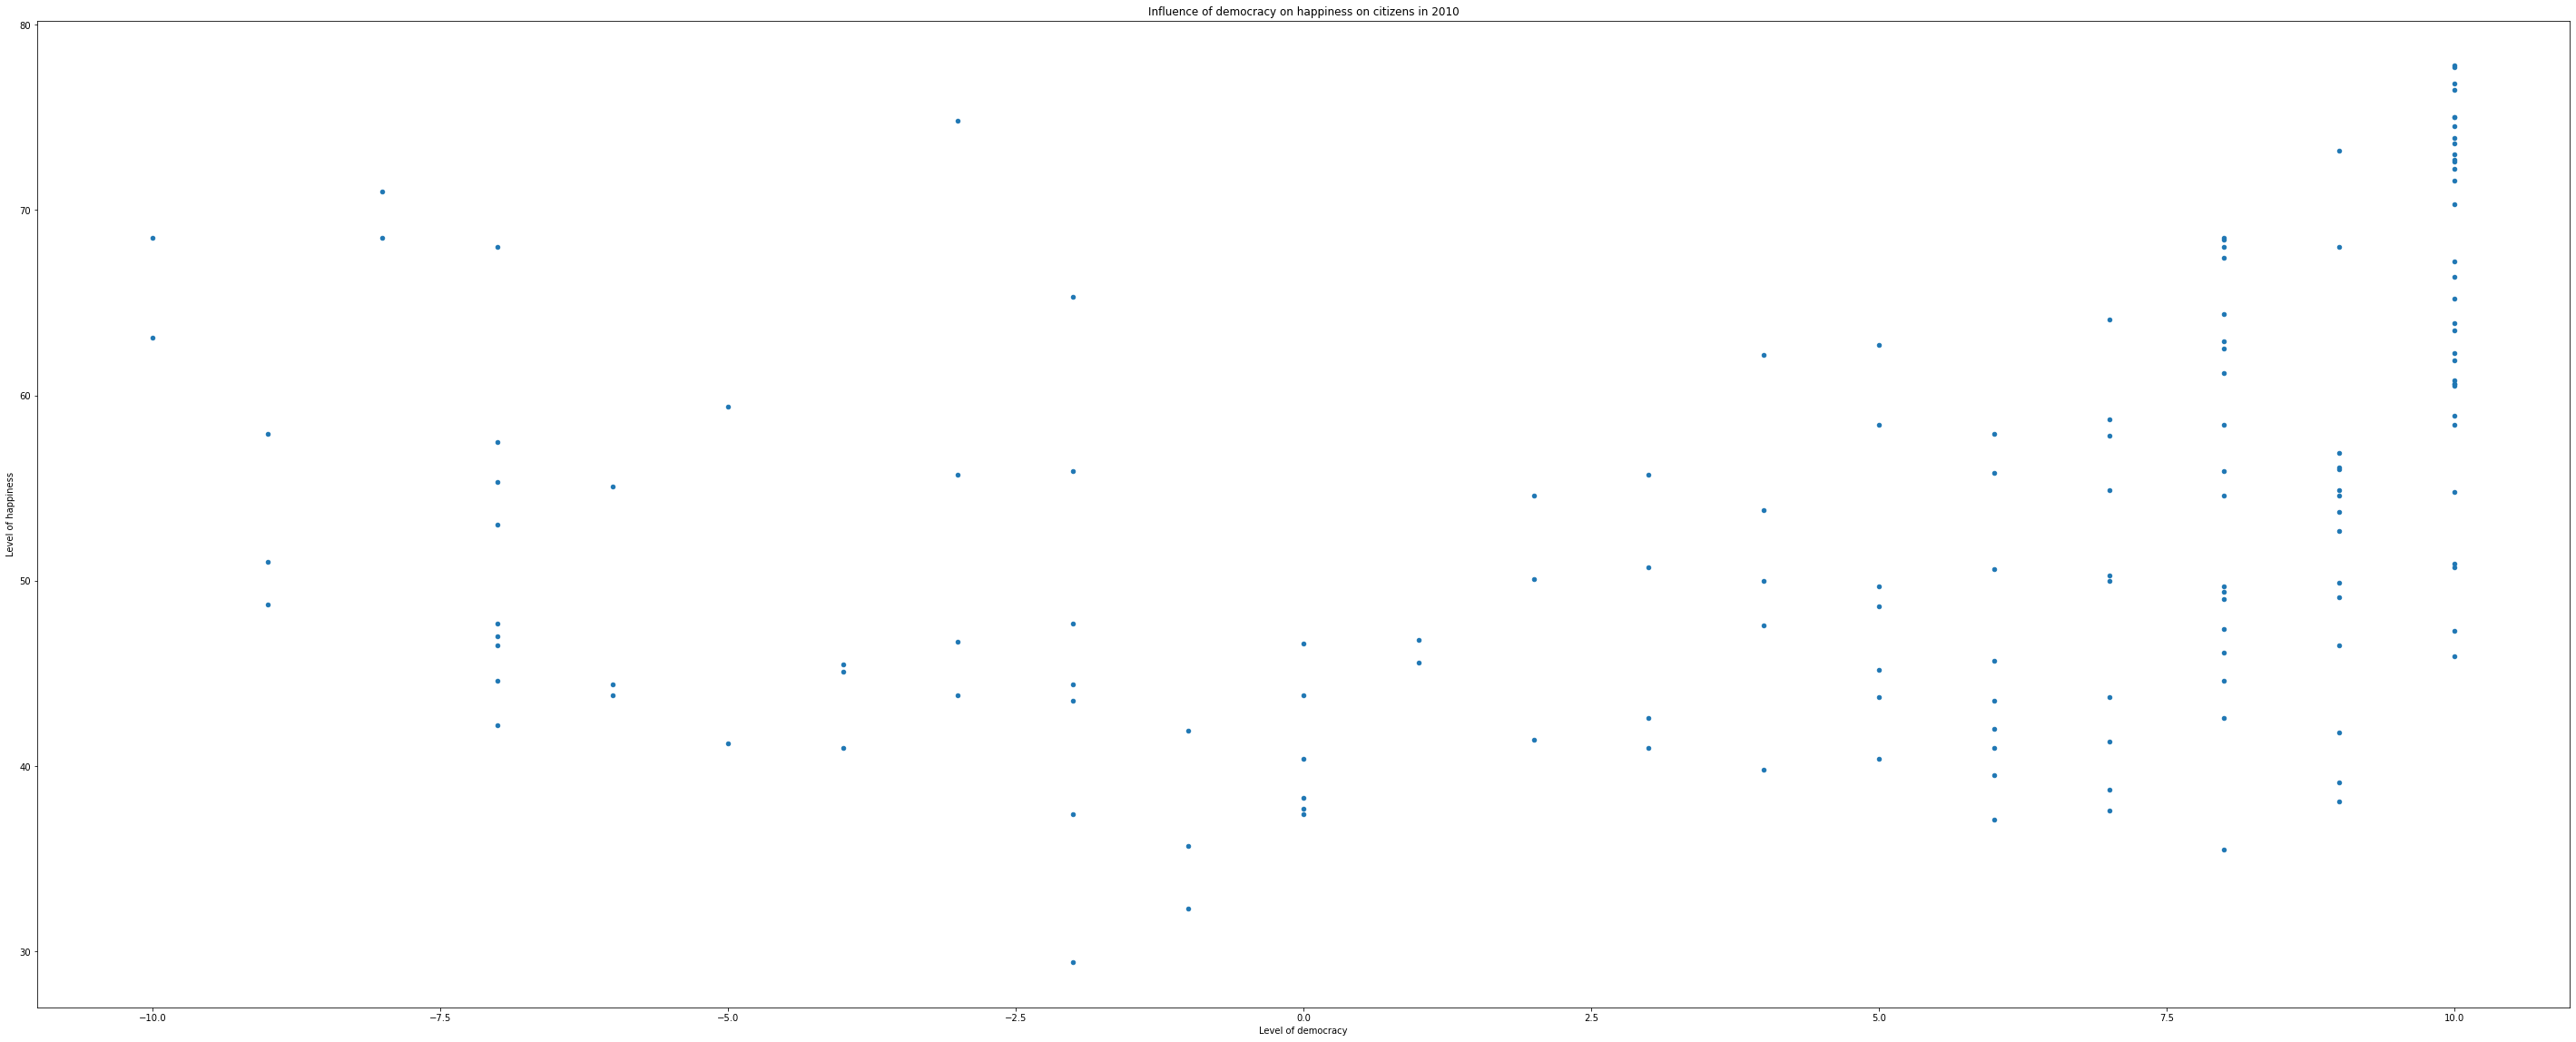

In [72]:
demohappy.plot(x='2010_democracy',y='2010_happyness',kind='scatter',figsize=(50,20),xlabel='Level of democracy',
               ylabel='Level of happiness',title='Influence of democracy on happiness on citizens in 2010')

<AxesSubplot:title={'center':'Influence of democracy on happiness on citizens in 2011'}, xlabel='Level of democracy', ylabel='Level of happiness'>

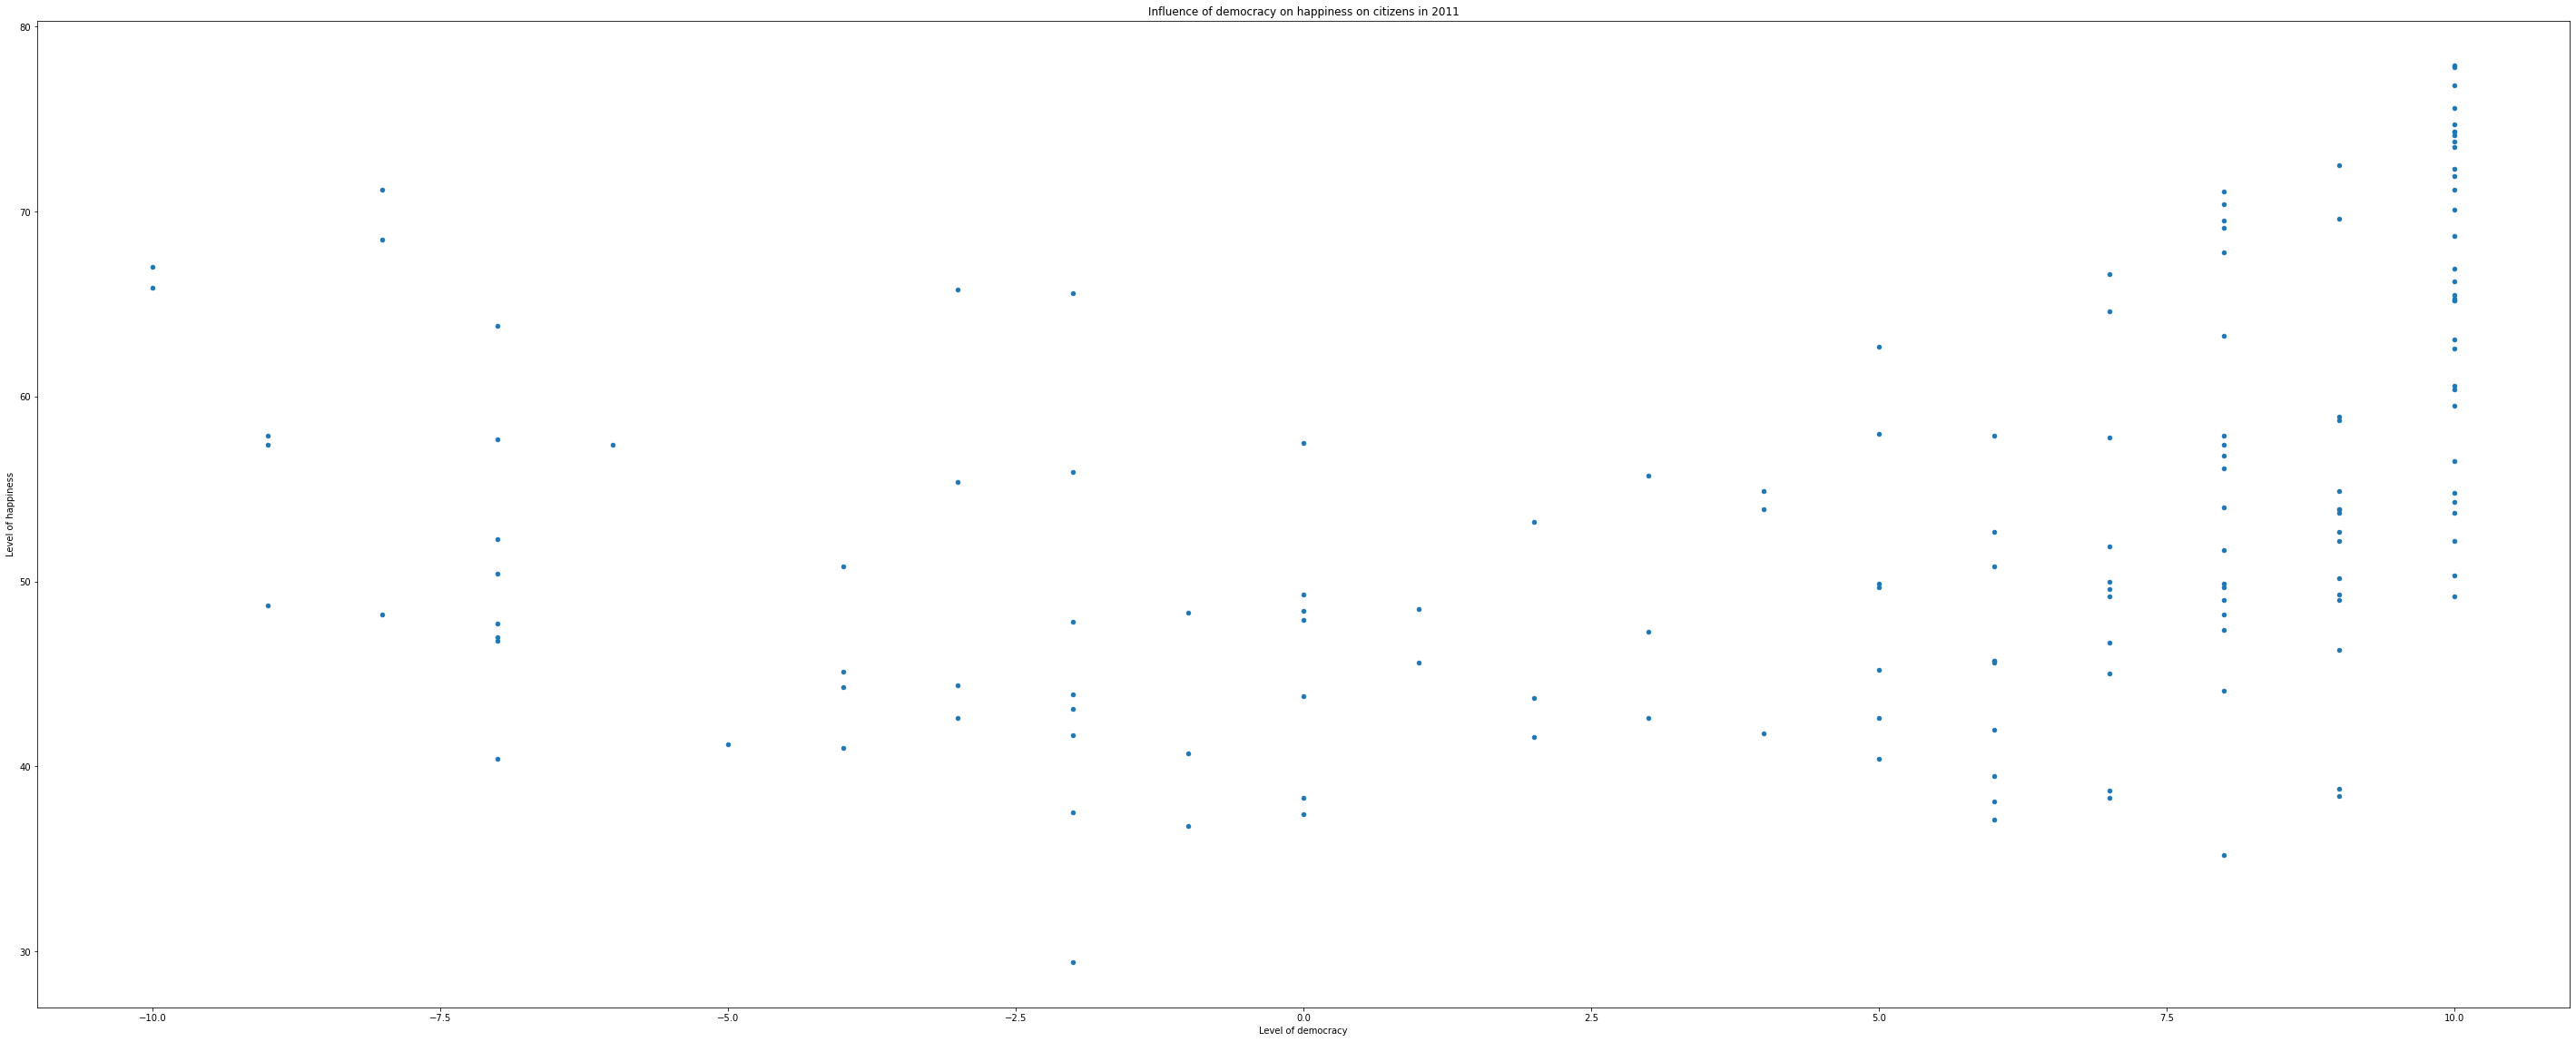

In [73]:
demohappy.plot(x='2011_democracy',y='2011_happyness',kind='scatter',figsize=(50,20),xlabel='Level of democracy',
               ylabel='Level of happiness',title='Influence of democracy on happiness on citizens in 2011')

And no, We couldn't see many changes in people's perspective over the years. Peoples are still more happy in democratic countries. Let's jump to the next question, but do they earn more money?

In [66]:
demoinc.head()

,country,2005_democracy,2006_democracy,2007_democracy,2008_democracy,2009_democracy,2010_democracy,2011_democracy,2005_income,2006_income,2007_income,2008_income,2009_income,2010_income,2011_income
1,Albania,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8040.0,8570.0,9150.0,9910.0,10300.0,10700.0,11100.0
2,Algeria,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10500.0,10500.0,10700.0,10800.0,10800.0,11000.0,11100.0
3,Angola,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,4310.0,5610.0,6960.0,7850.0,7760.0,7690.0,7680.0
4,Argentina,8.0,8.0,8.0,8.0,8.0,8.0,8.0,19400.0,20800.0,22400.0,23100.0,21500.0,23500.0,24600.0
5,Armenia,5.0,5.0,5.0,5.0,5.0,5.0,5.0,7420.0,8460.0,9710.0,10500.0,9050.0,9290.0,9730.0


<AxesSubplot:title={'center':'Influence of democracy on GDPPC od citizens in 2005'}, xlabel='Level of democracy', ylabel='Gross Domestic Product per capita'>

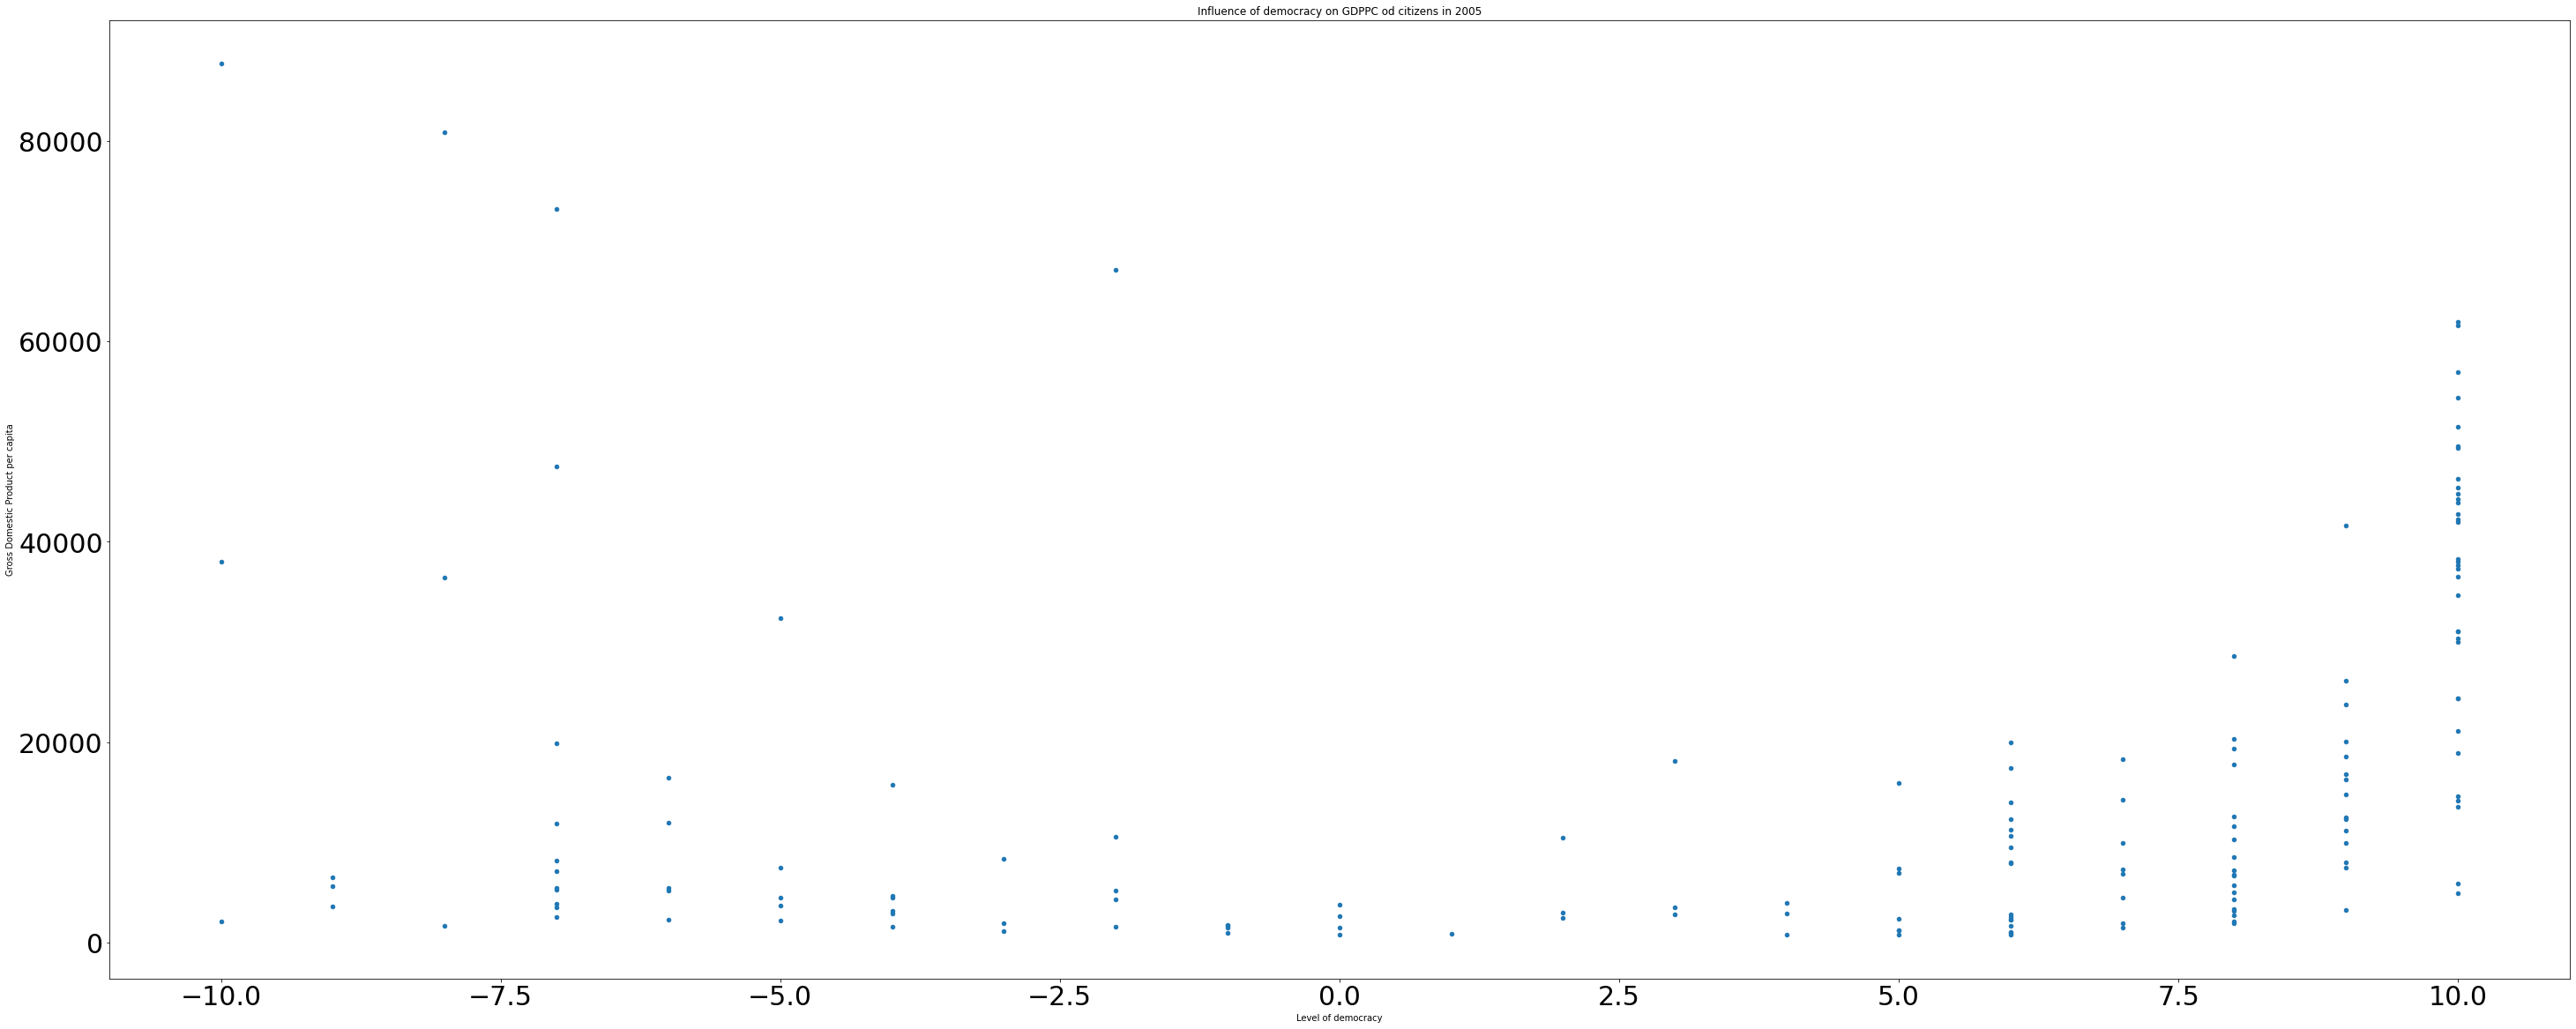

In [74]:
demoinc.plot(x='2005_democracy',y='2005_income',kind='scatter',figsize=(50,20),fontsize=30,
             xlabel='Level of democracy',ylabel='Gross Domestic Product per capita',title='Influence of democracy on GDPPC od citizens in 2005')

In 2005 peoples were earning more money in democratic countries in general. We can see some exceptions of well-developed countries which are not democratic, but in general, there is a massive disproportion between democratic and not democratic countries in terms of income per capita. As previously, let's check the following years if the trend remained the same.

<AxesSubplot:title={'center':'Influence of democracy on GDPPC od citizens in 2006'}, xlabel='Level of democracy', ylabel='Gross Domestic Product per capita'>

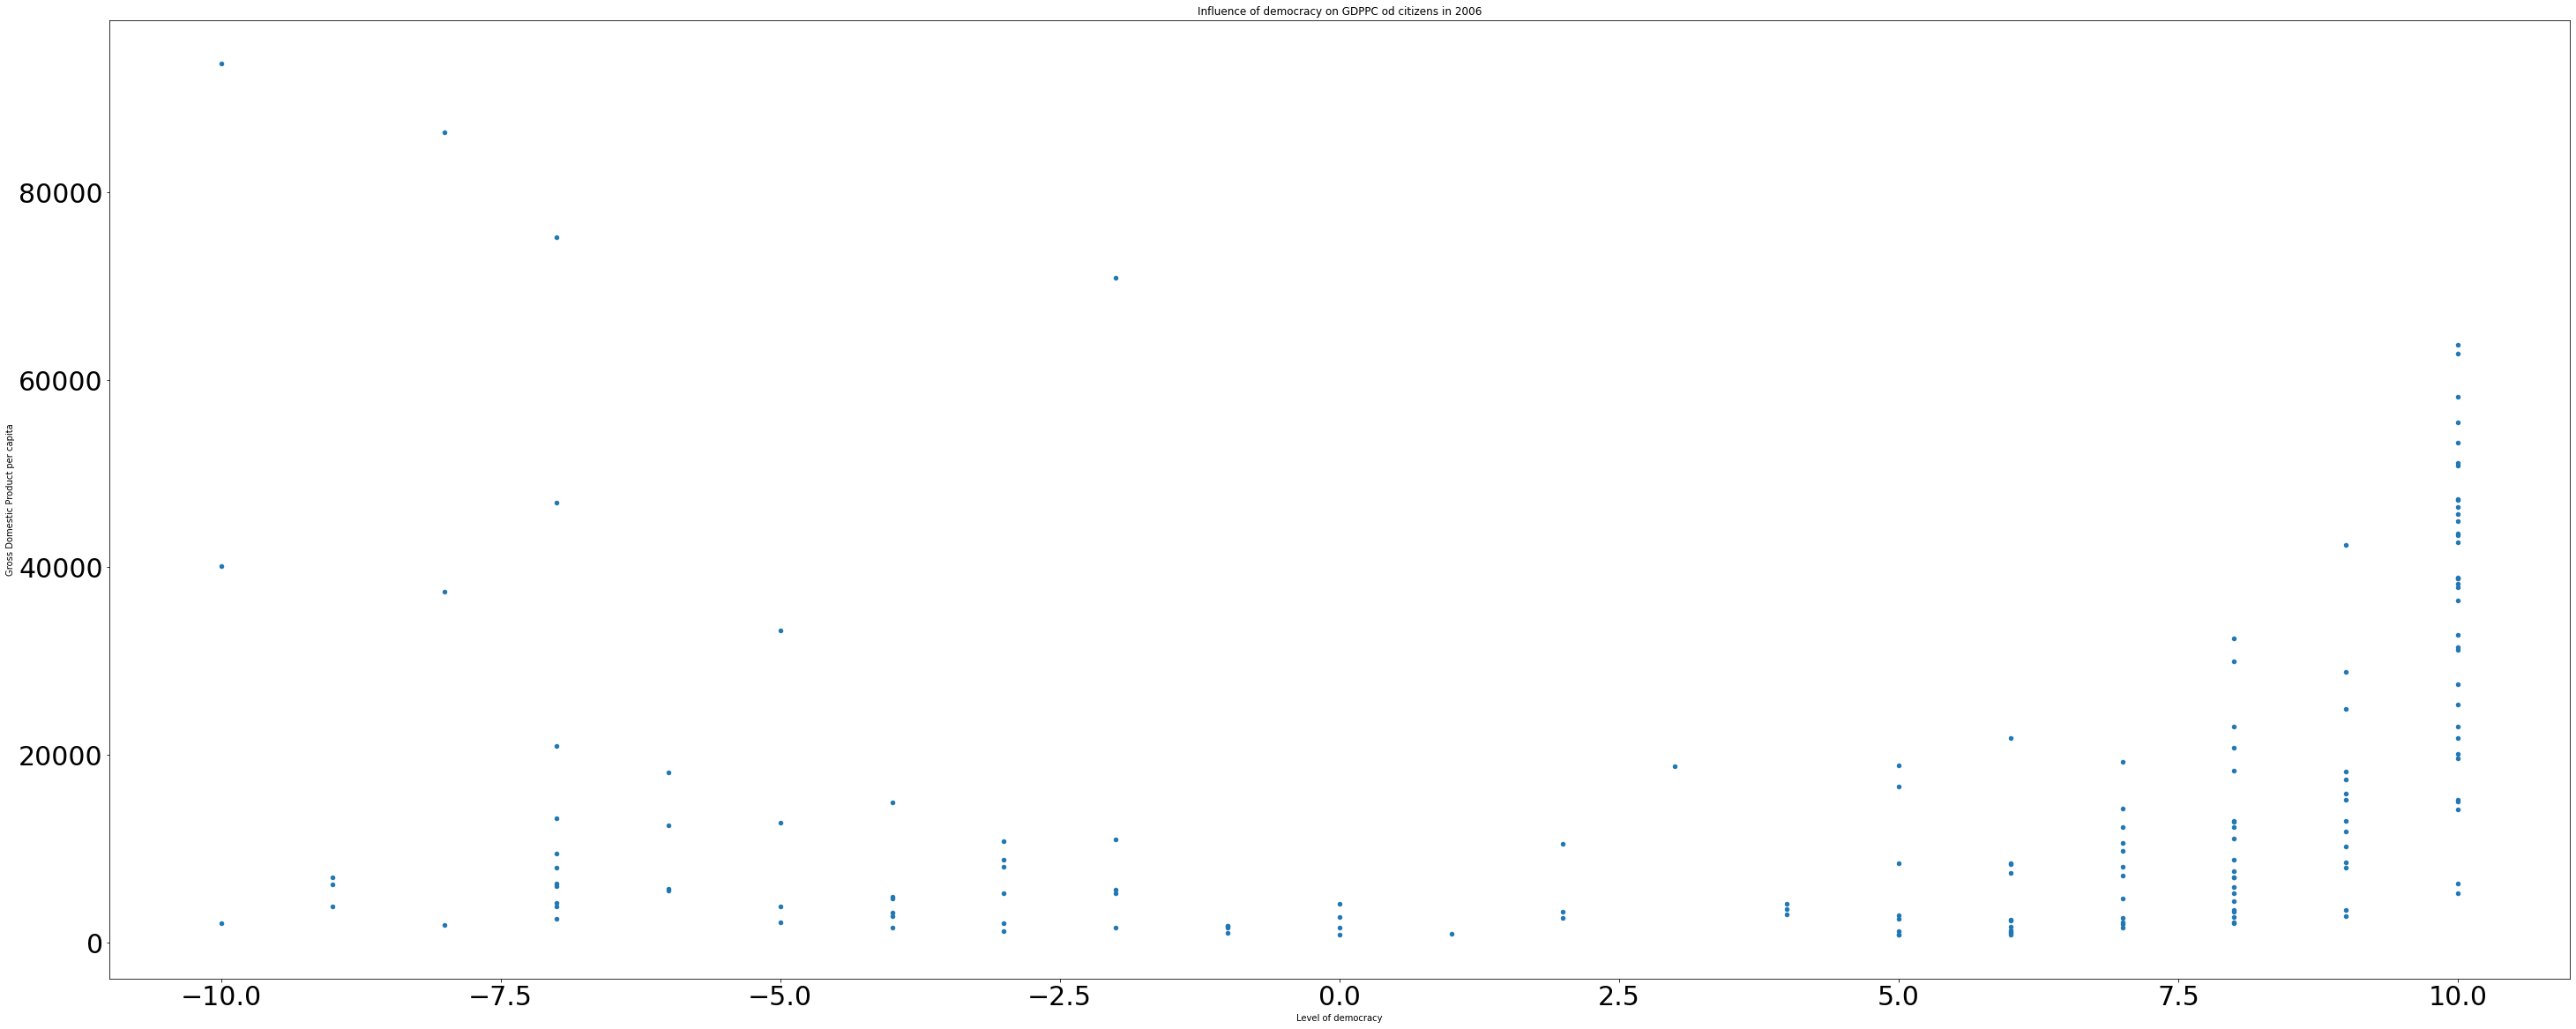

In [75]:
demoinc.plot(x='2006_democracy',y='2006_income',kind='scatter',figsize=(50,20),fontsize=30,xlabel='Level of democracy',
             ylabel='Gross Domestic Product per capita',title='Influence of democracy on GDPPC od citizens in 2006')

<AxesSubplot:title={'center':'Influence of democracy on GDPPC od citizens in 2007'}, xlabel='Level of democracy', ylabel='Gross Domestic Product per capita'>

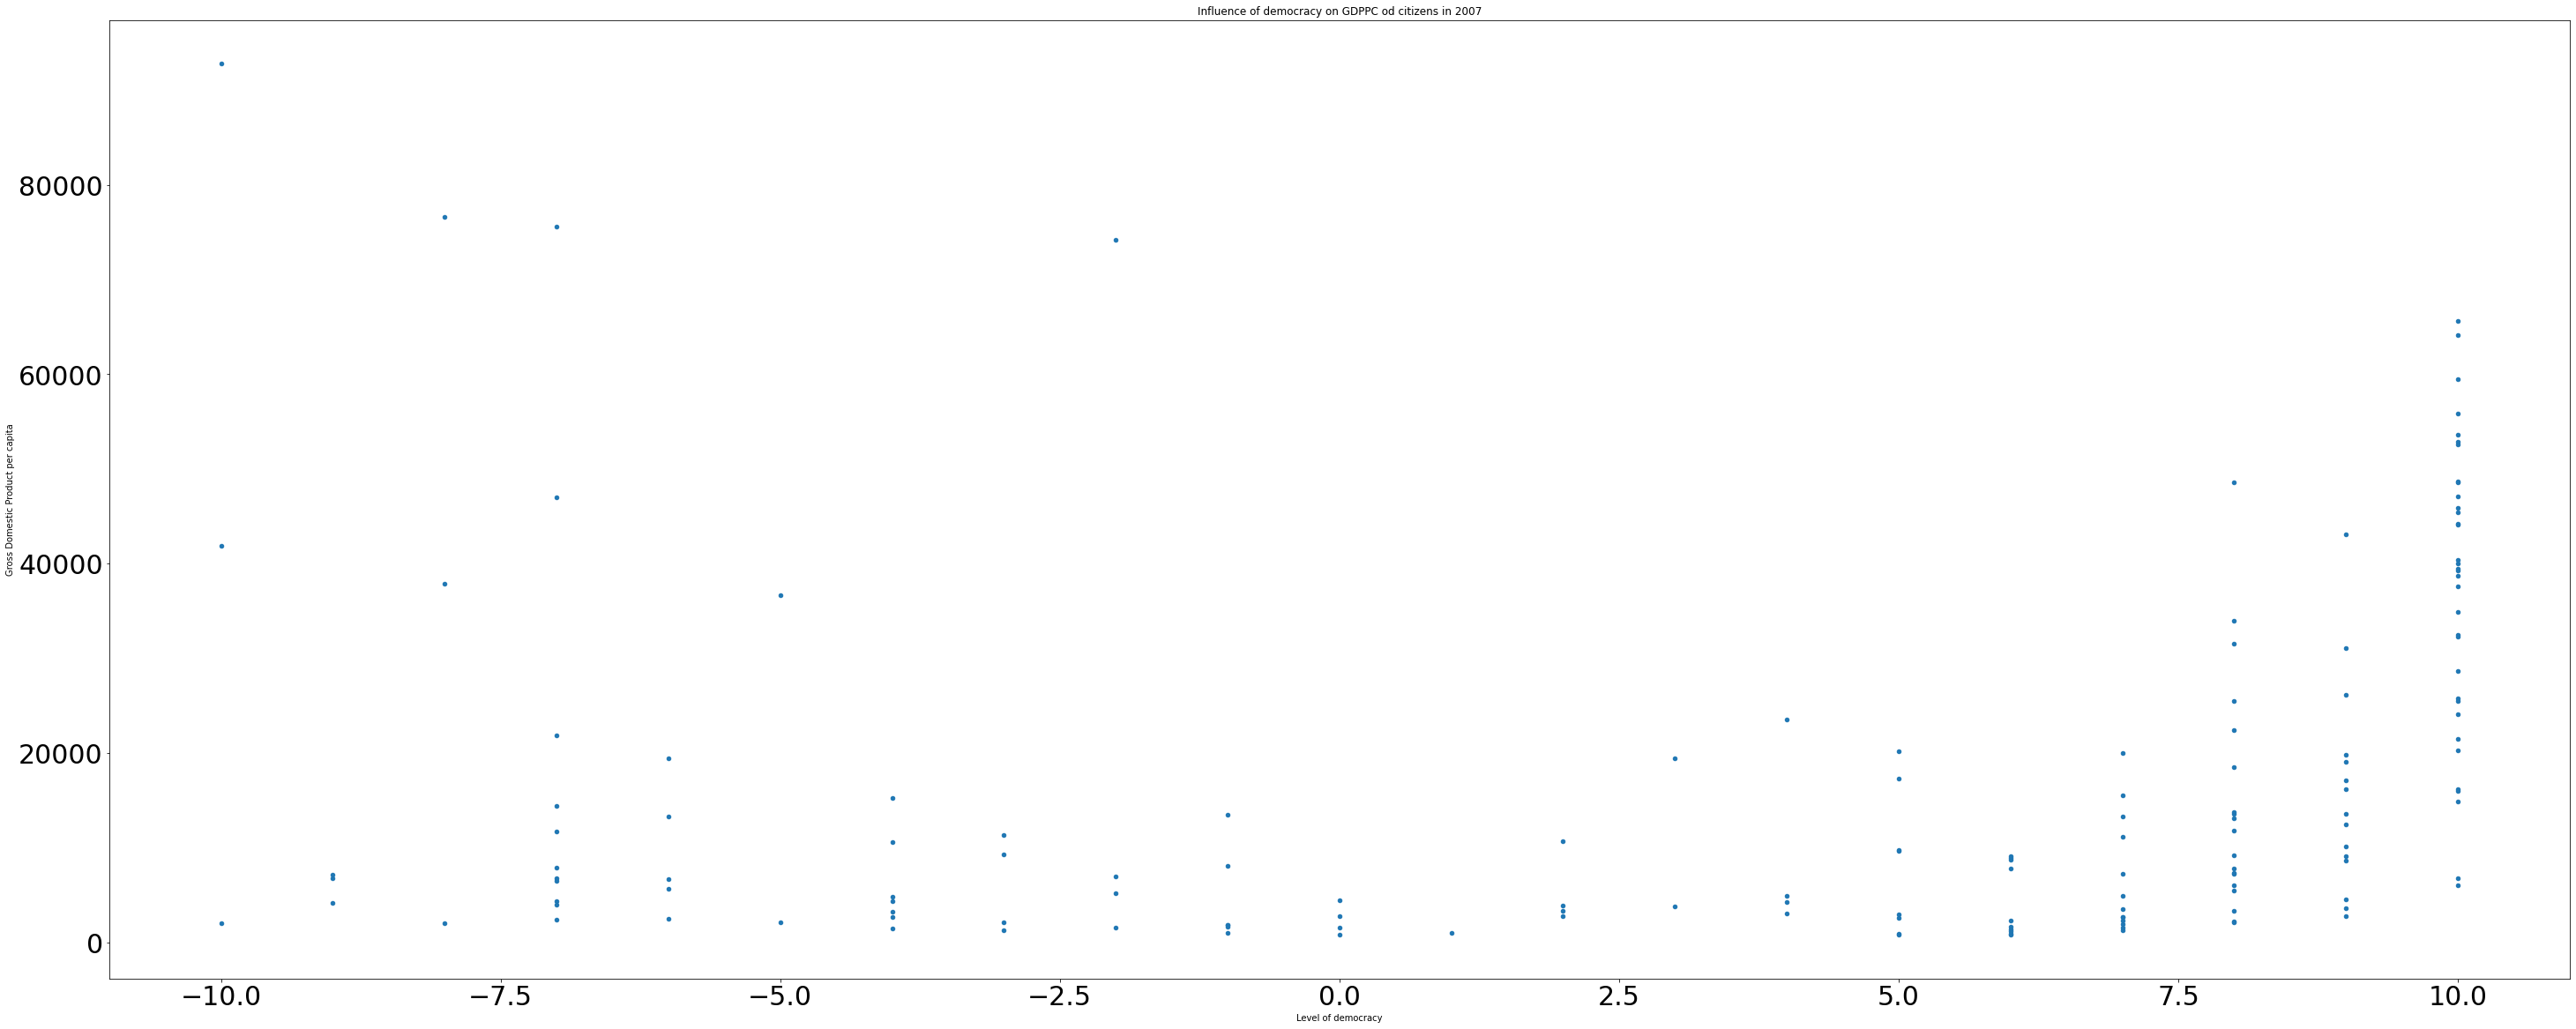

In [76]:
demoinc.plot(x='2007_democracy',y='2007_income',kind='scatter',figsize=(50,20),fontsize=30,
             xlabel='Level of democracy',ylabel='Gross Domestic Product per capita',title='Influence of democracy on GDPPC od citizens in 2007')

<AxesSubplot:title={'center':'Influence of democracy on GDPPC od citizens in 2008'}, xlabel='Level of democracy', ylabel='Gross Domestic Product per capita'>

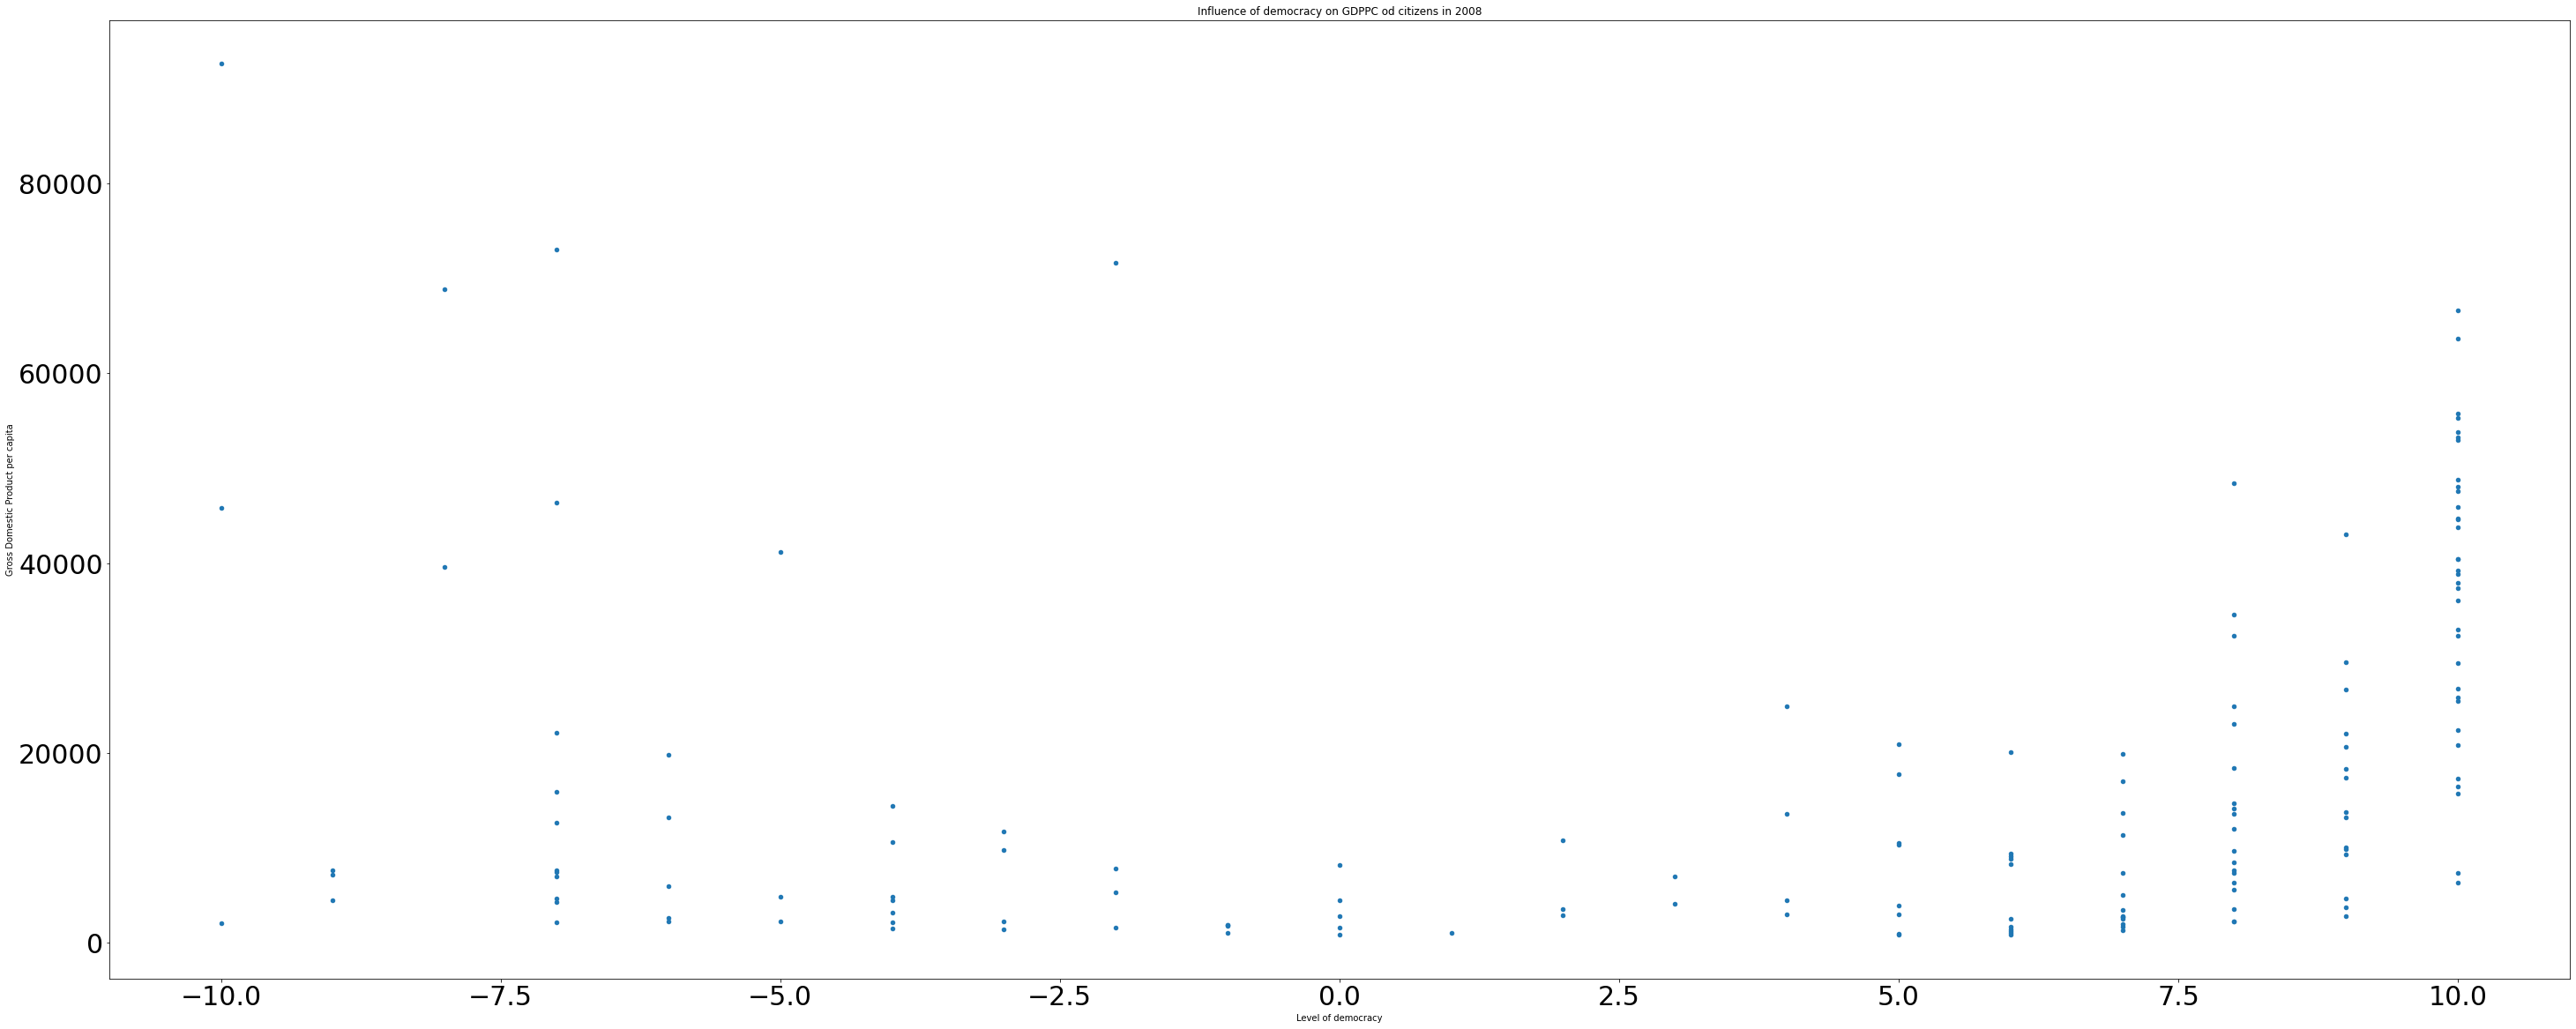

In [77]:
demoinc.plot(x='2008_democracy',y='2008_income',kind='scatter',figsize=(50,20),fontsize=30,xlabel='Level of democracy',
             ylabel='Gross Domestic Product per capita',title='Influence of democracy on GDPPC od citizens in 2008')

<AxesSubplot:title={'center':'Influence of democracy on GDPPC od citizens in 2009'}, xlabel='Level of democracy', ylabel='Gross Domestic Product per capita'>

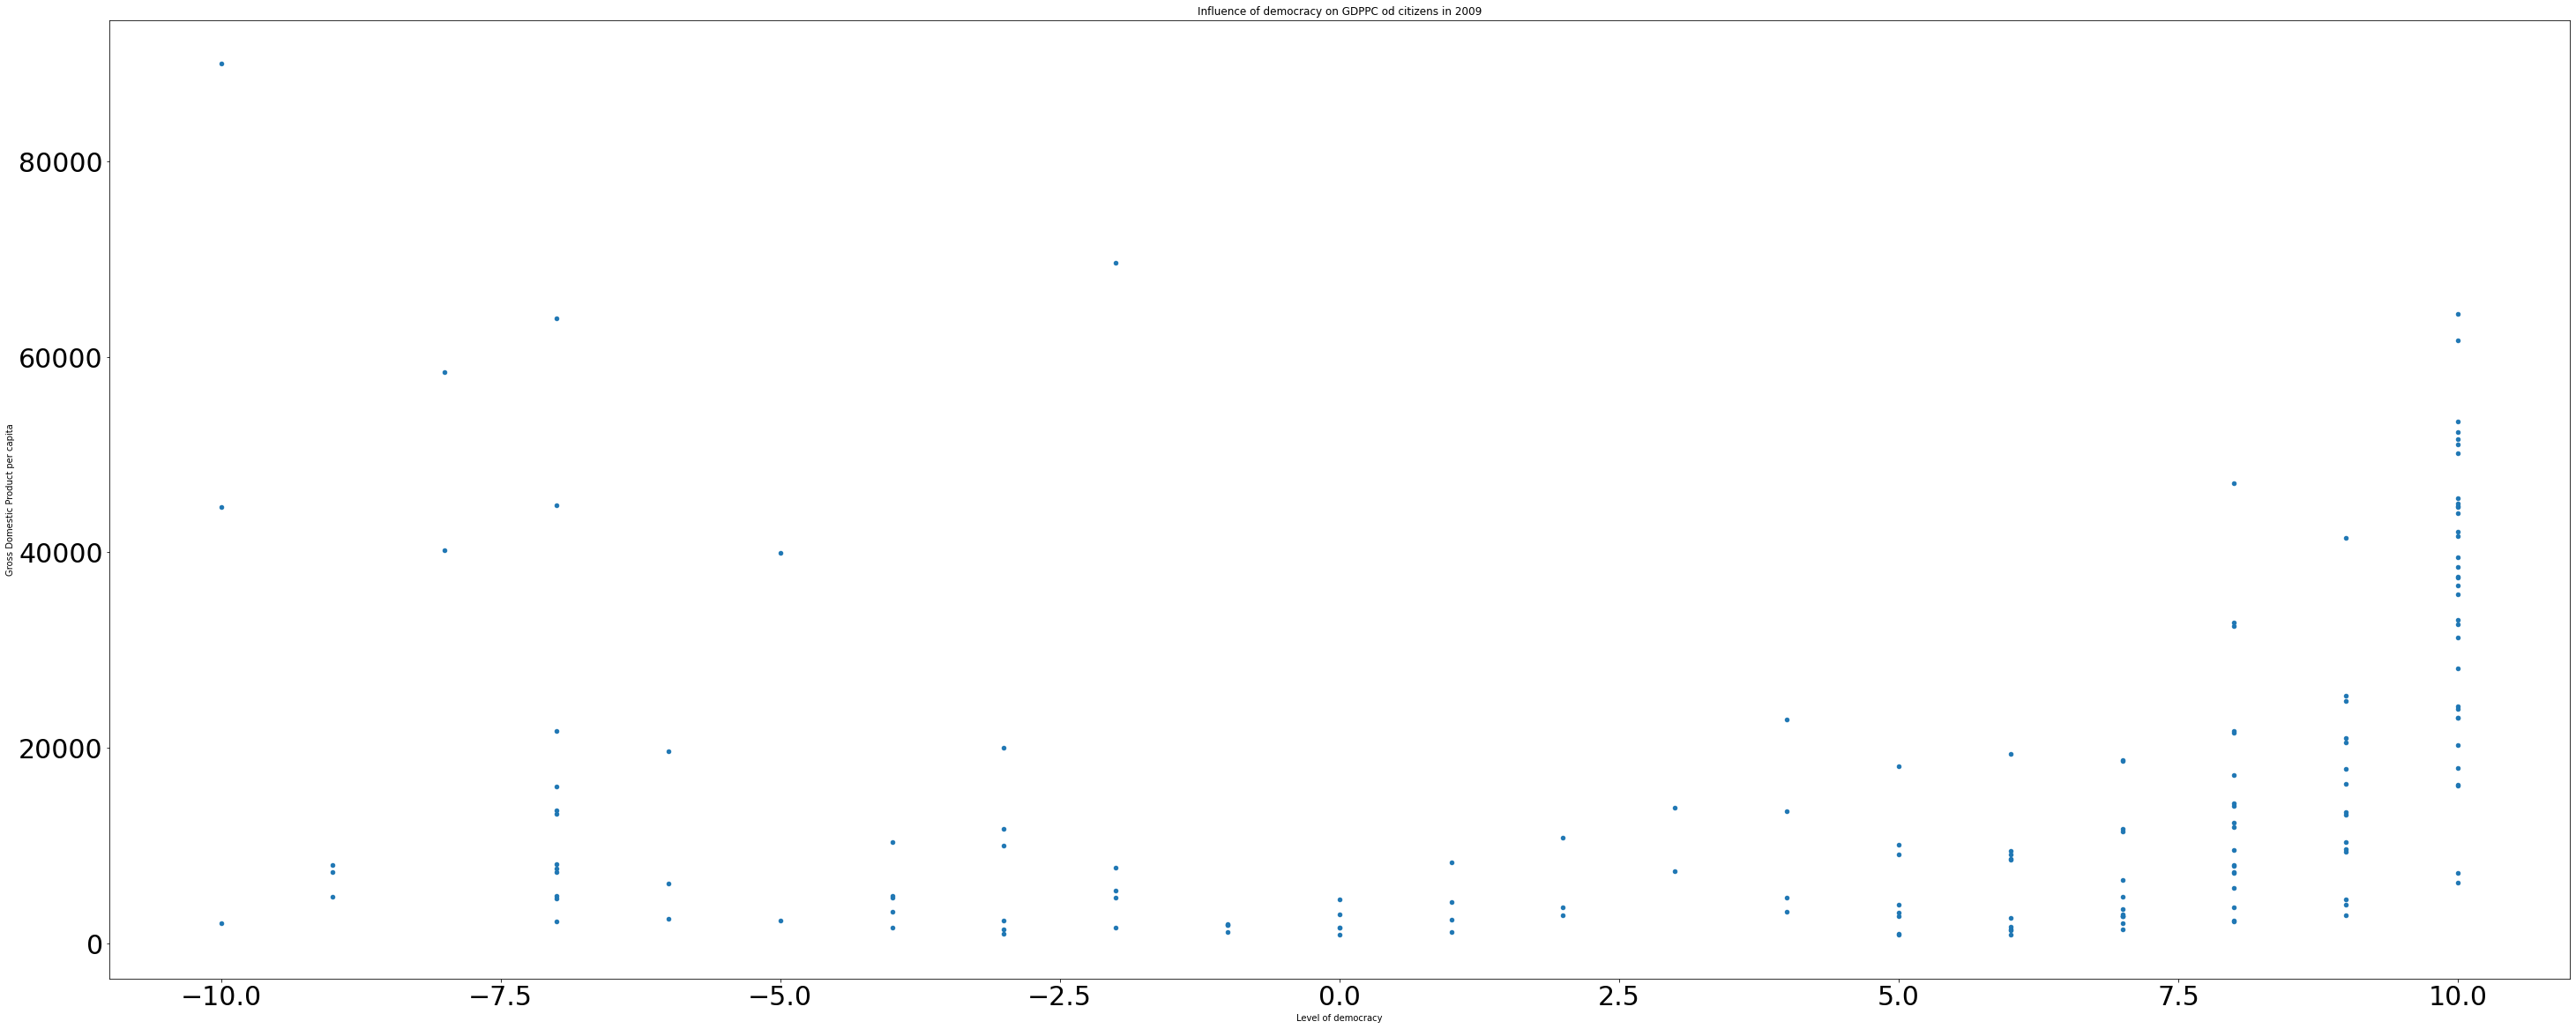

In [78]:
demoinc.plot(x='2009_democracy',y='2009_income',kind='scatter',figsize=(50,20),fontsize=30,xlabel='Level of democracy',
             ylabel='Gross Domestic Product per capita',title='Influence of democracy on GDPPC od citizens in 2009')

<AxesSubplot:title={'center':'Influence of democracy on GDPPC od citizens in 2010'}, xlabel='Level of democracy', ylabel='Gross Domestic Product per capita'>

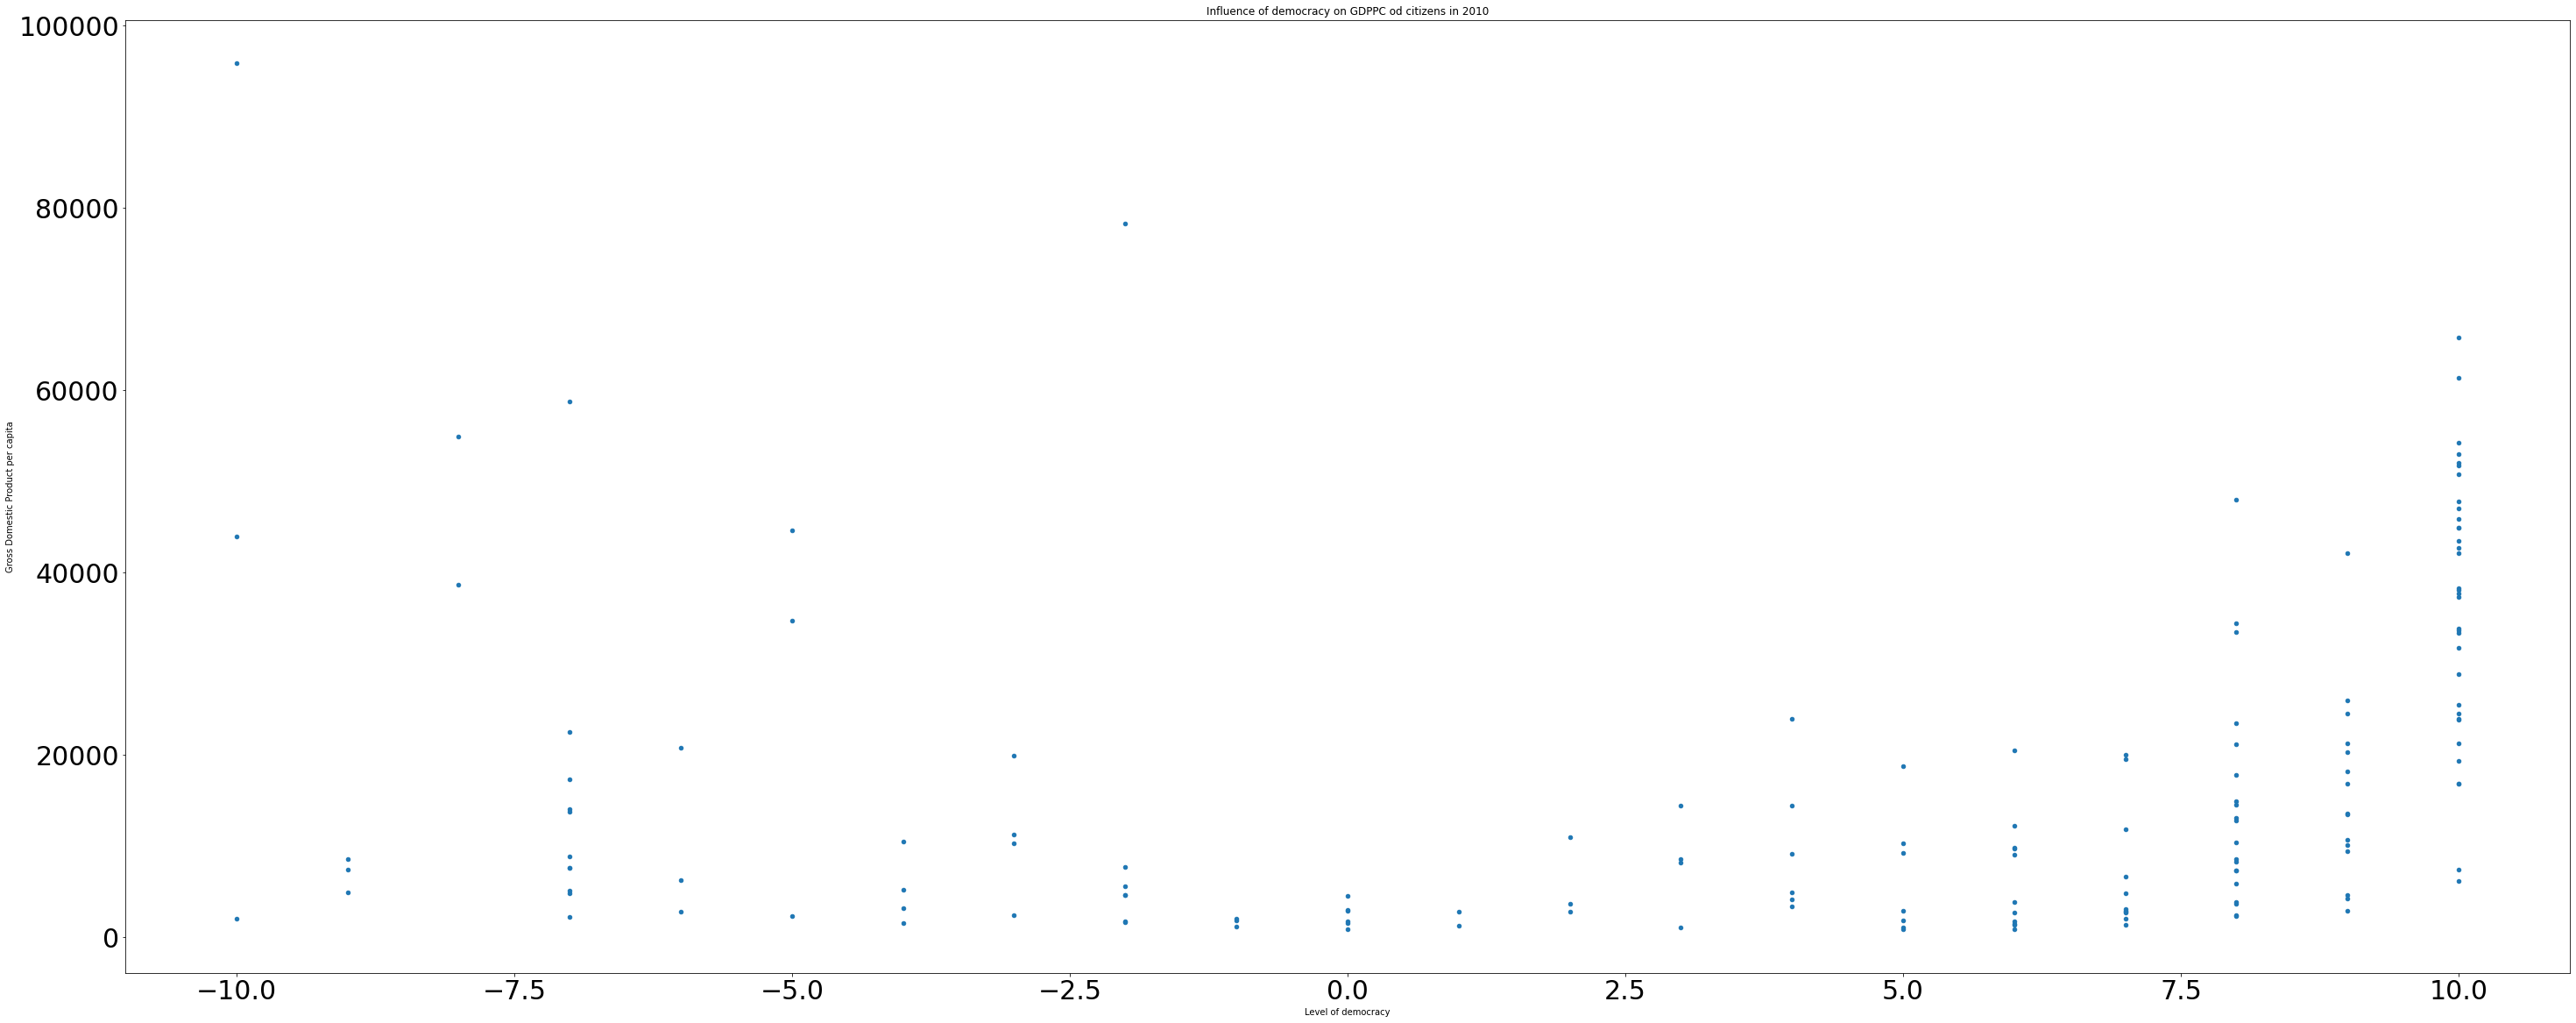

In [79]:
demoinc.plot(x='2010_democracy',y='2010_income',kind='scatter',figsize=(50,20),fontsize=30,xlabel='Level of democracy',
             ylabel='Gross Domestic Product per capita',title='Influence of democracy on GDPPC od citizens in 2010')

<AxesSubplot:title={'center':'Influence of democracy on GDPPC od citizens in 2011'}, xlabel='Level of democracy', ylabel='Gross Domestic Product per capita'>

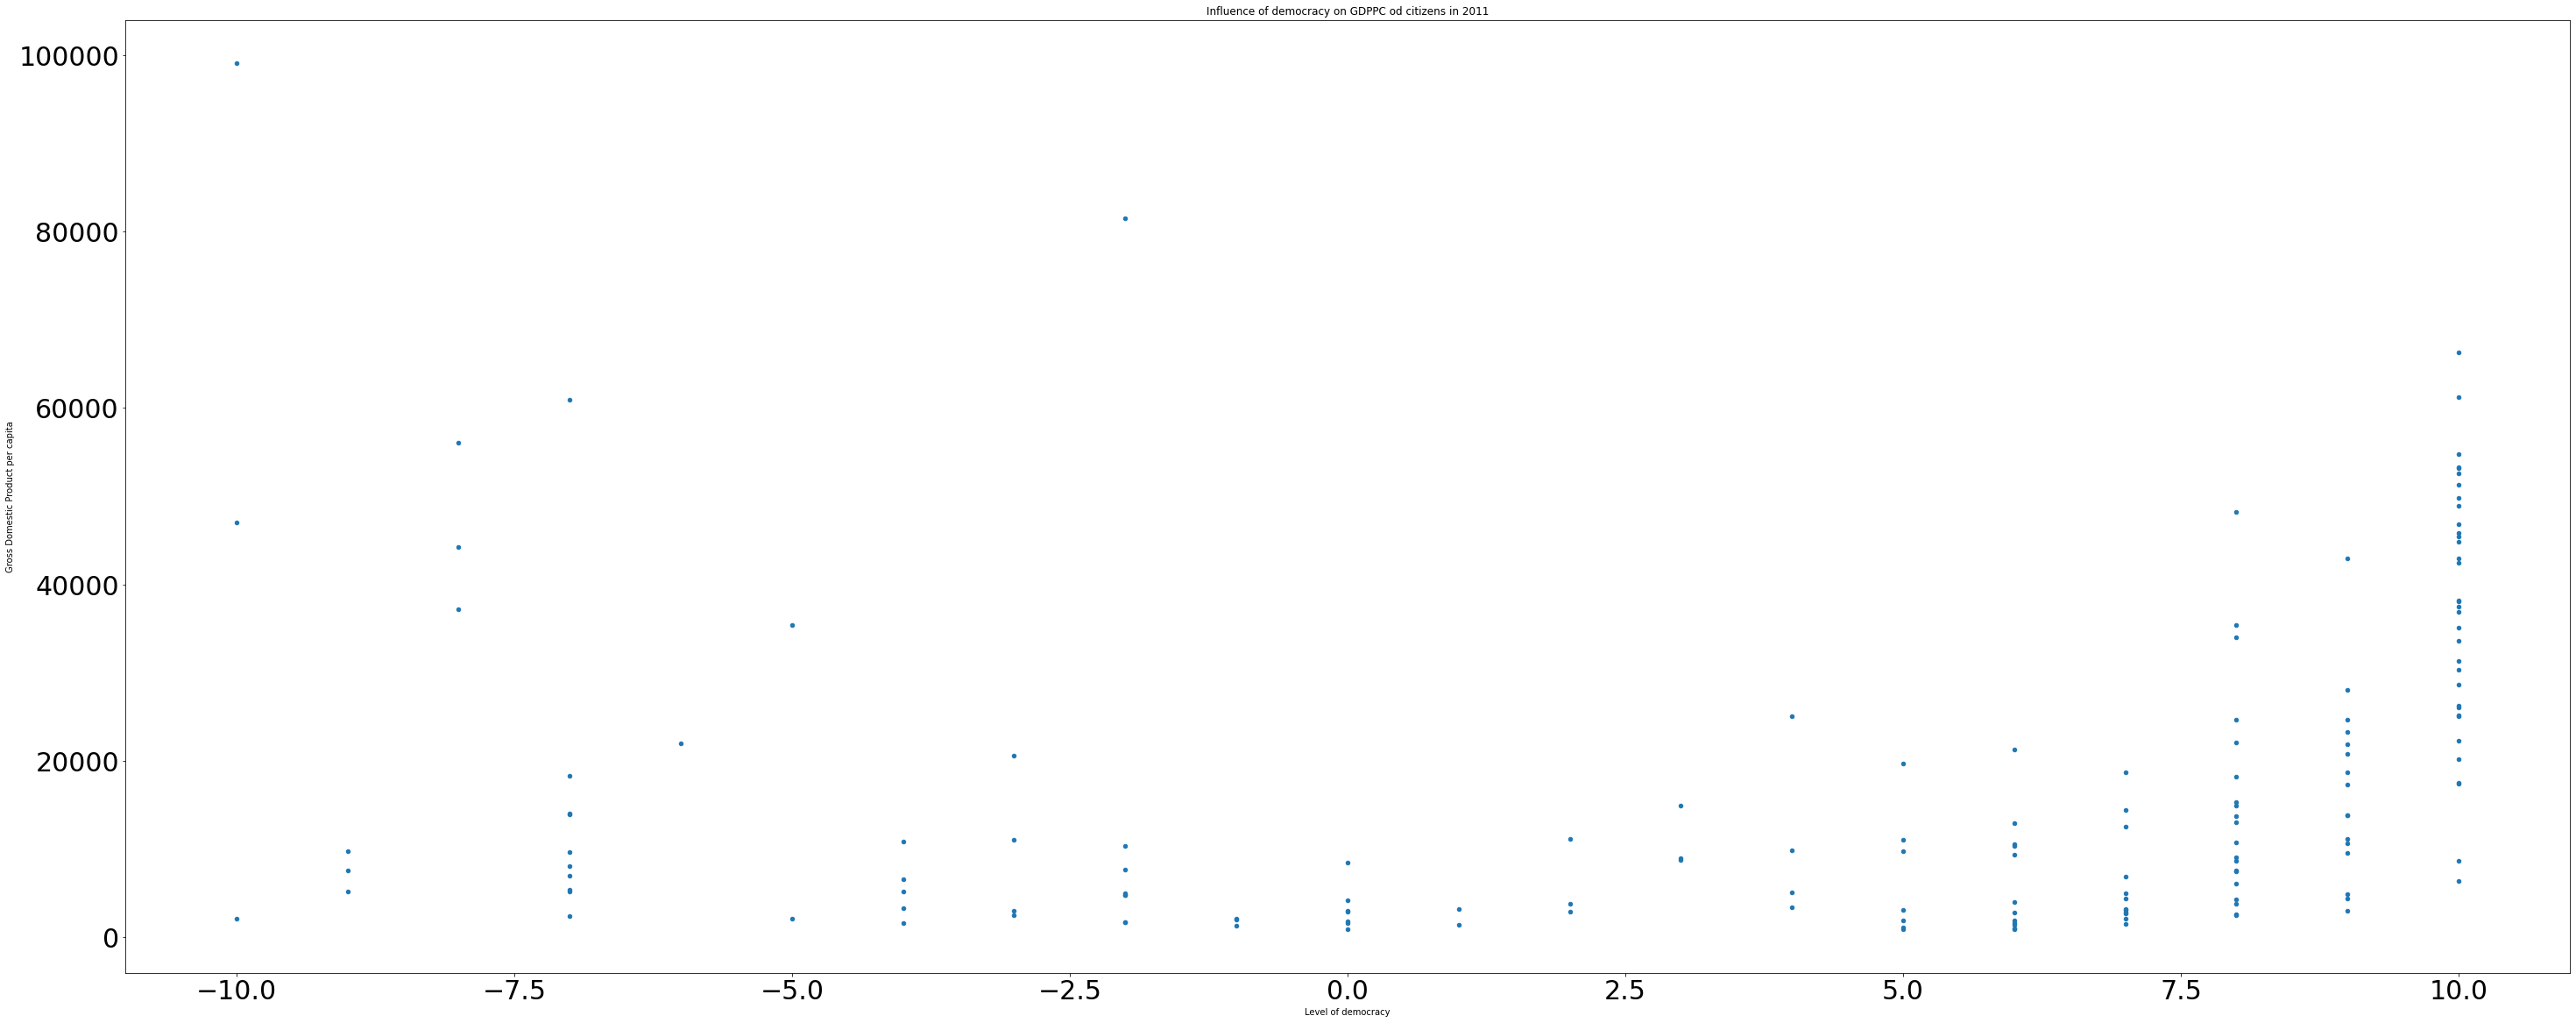

In [80]:
demoinc.plot(x='2011_democracy',y='2011_income',kind='scatter',figsize=(50,20),fontsize=30,xlabel='Level of democracy',
             ylabel='Gross Domestic Product per capita',title='Influence of democracy on GDPPC od citizens in 2011')

And again following years did not change much, so the answer is, Yes peoples do earn more in democratic countries.

Which continent has the highest score on average in human development index?


"The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions." - https://hdr.undp.org/data-center/human-development-index#/indicies/HDI

In [81]:
contgroups.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
continent,,,,,,,,,,,,,,,
africa,0.477769,0.485288,0.493346,0.501538,0.509692,0.514792,0.521585,0.528792,0.535962,0.541509,0.545811,0.549170,0.553736,0.557038,0.560736
asia,0.671283,0.679196,0.687174,0.693457,0.697413,0.703000,0.709532,0.715702,0.718723,0.721596,0.725787,0.728745,0.733277,0.736021,0.739362
australia & oceania,0.669545,0.673182,0.678091,0.681364,0.683273,0.688818,0.692273,0.694545,0.700273,0.703000,0.708091,0.709000,0.709667,0.710917,0.714083
europe,0.829707,0.834143,0.839905,0.844595,0.845381,0.849119,0.853524,0.856595,0.861667,0.865333,0.867952,0.871238,0.874238,0.877310,0.879881
north america,0.710696,0.717870,0.722913,0.728130,0.728870,0.731826,0.734304,0.736000,0.738478,0.743261,0.746478,0.749391,0.751435,0.753174,0.755957


<AxesSubplot:title={'center':'HDI by continents'}, xlabel='Years', ylabel='Human Development Index'>

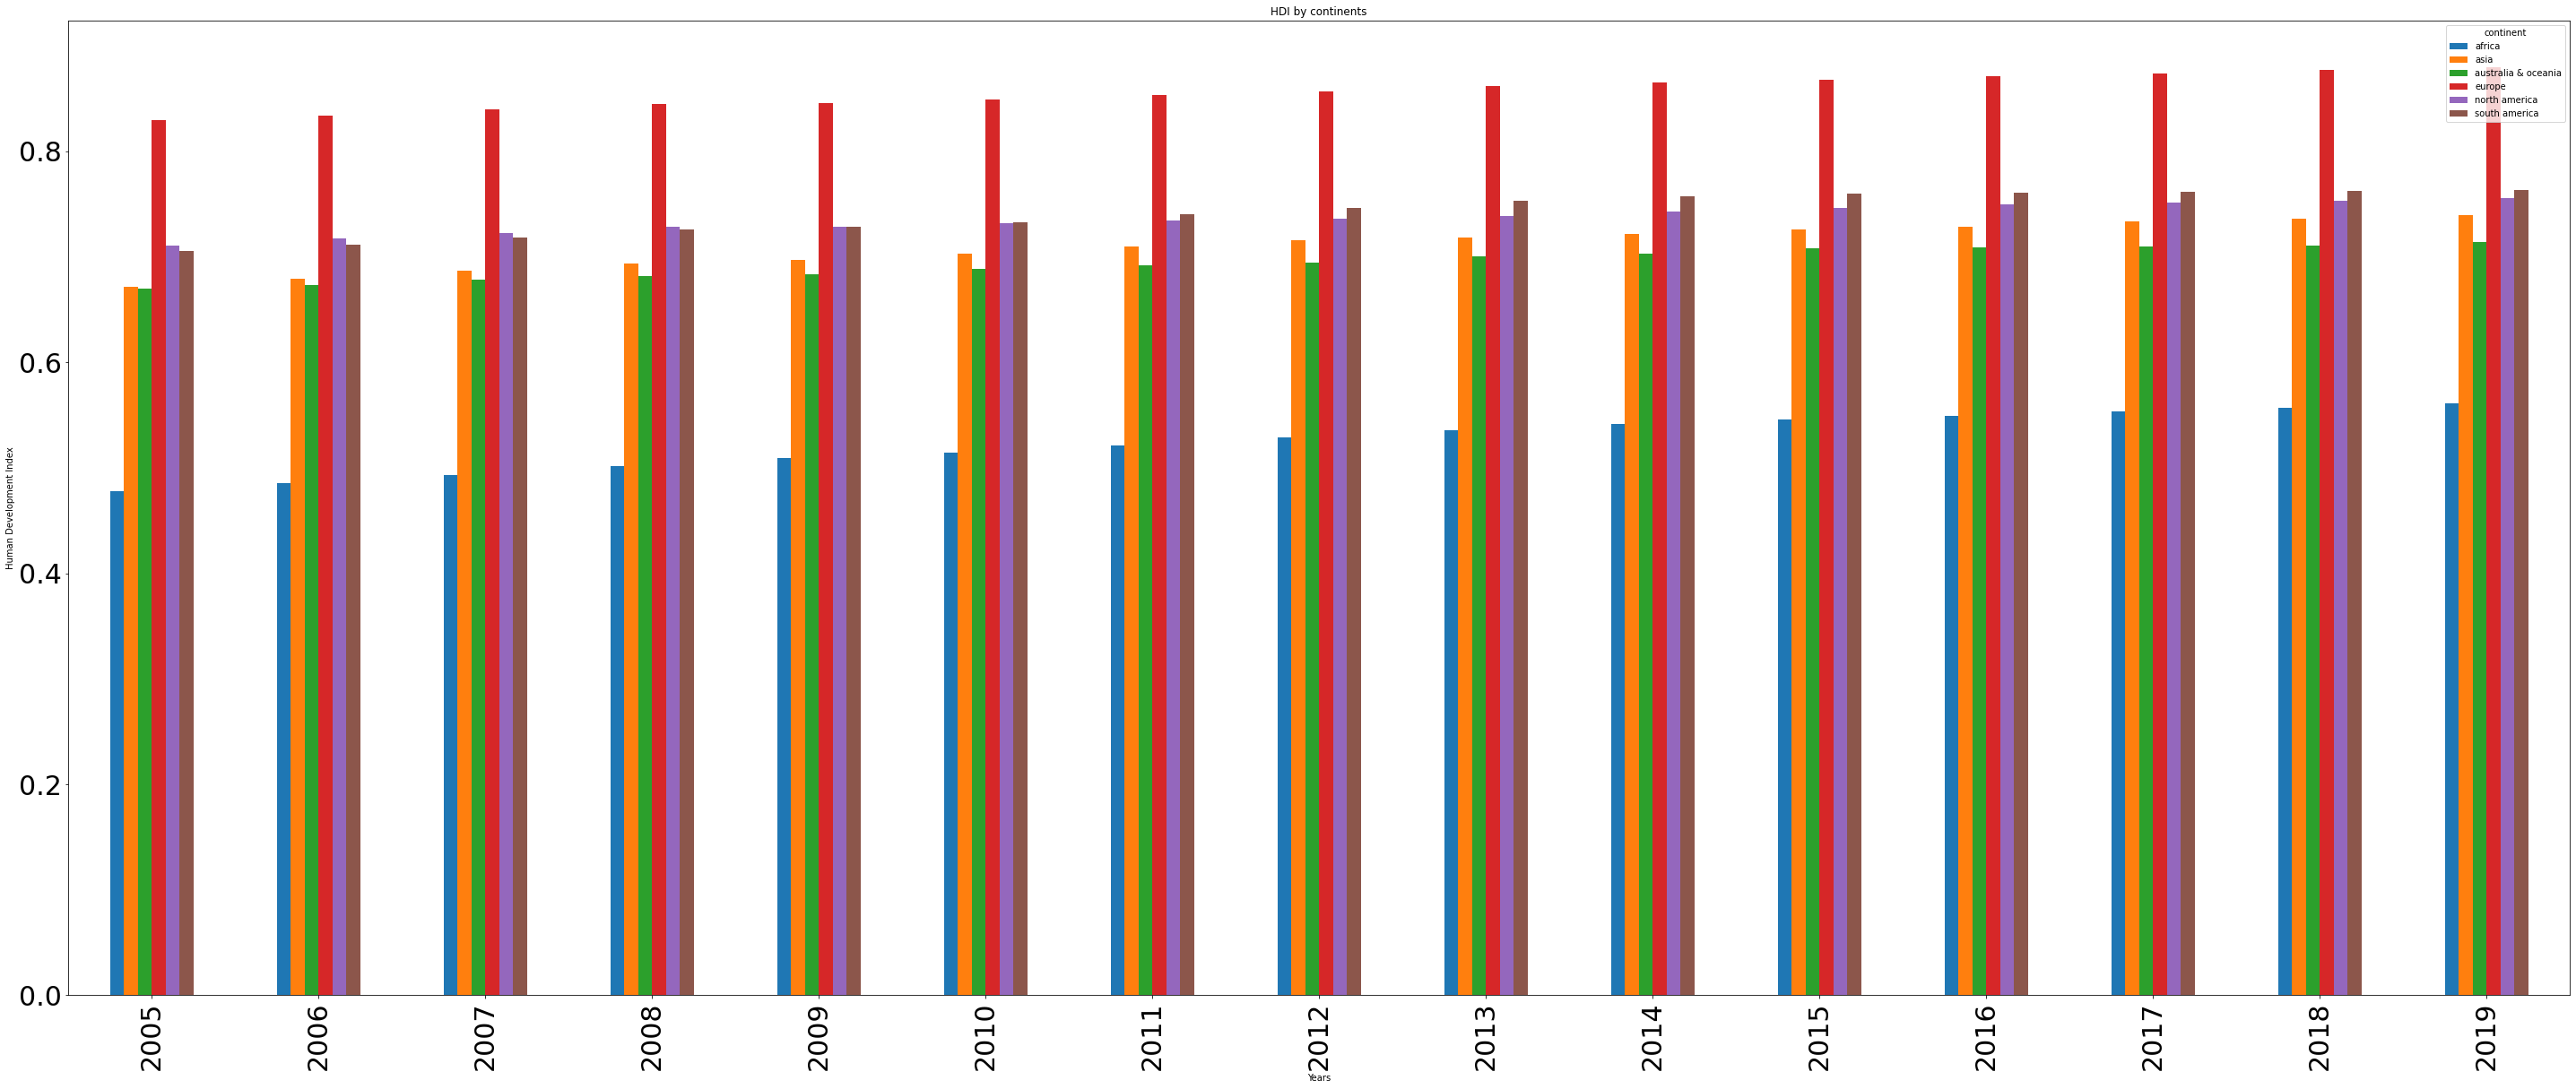

In [82]:
contgroups.transpose().plot(kind='bar',figsize=(50,20),fontsize=30,xlabel='Years',ylabel='Human Development Index',
                           title="HDI by continents")

Clearly, Europe is most developed in terms of human development by far.

Which country made the biggest progress in terms
of human development in the last decade?

In [84]:
hdilastdecade.tail(5)

,progress_2009-2019,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,
Samoa,0.024,0.691,0.698,0.701,0.698,0.700,0.703,0.707,0.710,0.710,0.709,0.715
Yemen,-0.032,0.502,0.506,0.506,0.504,0.509,0.502,0.483,0.474,0.467,0.468,0.470
South Africa,0.054,0.655,0.664,0.665,0.675,0.685,0.693,0.701,0.703,0.705,0.707,0.709
Zambia,0.067,0.517,0.527,0.534,0.549,0.557,0.561,0.569,0.571,0.578,0.582,0.584
Zimbabwe,0.113,0.458,0.482,0.499,0.525,0.537,0.547,0.553,0.558,0.563,0.569,0.571


In [85]:
hdilastdecade['progress_2009-2019'].max()

0.11299999999999999

In [86]:
hdilastdecade.where(hdilastdecade['progress_2009-2019'] == 0.11299999999999999).dropna()

,progress_2009-2019,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,
Eswatini,0.113,0.498,0.51,0.524,0.539,0.554,0.568,0.581,0.588,0.597,0.605,0.611


In [87]:
EstwaniProgress = hdilastdecade.where(hdilastdecade['progress_2009-2019'] == 0.11299999999999999).dropna().drop(axis=1,columns='progress_2009-2019')

<AxesSubplot:title={'center':'1D graph of Estwatini progress in terms of HDI'}, xlabel='Years', ylabel='Human Development Index'>

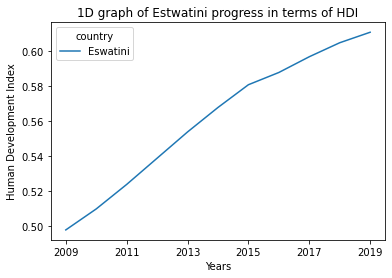

In [88]:
EstwaniProgress.transpose().plot(kind='line',xlabel='Years',ylabel='Human Development Index',
                                title='1D graph of Estwatini progress in terms of HDI')

And the winner is Eswatini! Good for You peoples of Eswatini, keep it that way!

What would be 10 greatest countries to live in
terms of happiness and prosperity in 2019?

In [89]:
top.head()

,2019_income,2019_happyness
country,,
Afghanistan,2070.0,25.7
Albania,13700.0,48.8
Algeria,11500.0,50.1
Argentina,22100.0,59.7
Armenia,13700.0,46.8


In [90]:
top.sort_values(by='2019_income',ascending=False).head(10)

,2019_income,2019_happyness
country,,
Luxembourg,117000.0,72.4
Singapore,98400.0,63.8
Ireland,86700.0,70.9
Switzerland,70900.0,75.6
United Arab Emirates,68300.0,67.9
Norway,64400.0,74.9
United States,62600.0,69.4
"Hong Kong, China",59600.0,55.1
Denmark,57200.0,76.5


We got top 10 countries to live in terms of income above and hapiness below.

In [91]:
top.sort_values(by='2019_happyness',ascending=False).head(10)

,2019_income,2019_happyness
country,,
Finland,48600.0,78.1
Denmark,57200.0,76.5
Switzerland,70900.0,75.6
Iceland,56900.0,75.0
Norway,64400.0,74.9
Netherlands,56800.0,74.5
Sweden,52900.0,73.5
New Zealand,42900.0,73.0
Austria,55800.0,72.9


Anyone thinking about moving there? ;)

Summary:

In this project, we found that peoples living in democratic countries tends to be more happy, and they do earn more money.
Europe is the most developed country according to Human Development Index. Eswatini is the quickest developing country in the same index, and we have found 10 top countries to live in 2019.

Limitations: Some countries were excluded due to lack of data, however it was not a significant number.
Some values were also filled with first known value for that country if some years were missing, however it was not a great amount and I believe my discoveries reflects the situation in general.